In [2]:
# Assigment 3
# 

# Initialisation of libraries 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(1, len(arr)):
        dub[i] = dub[i - 1] + alp * (dub[i] - dub[i - 1])
    return dub

In [4]:
def backward_exp_smooth(alp, arr):
    dub = np.array(arr)
    for i in range(len(arr) - 1):
        dub[i] = dub[i + 1] + alp * (dub[i] - dub[i + 1])
    return dub

In [5]:
def mean_smooth(wind, arr):
    dub = np.array(arr)
    for i in range((wind -1) // 2 , len(dub) - (wind - 1) // 2):
        dub[i] = np.mean(dub[i - (wind - 1) // 2 : i + (wind - 1) // 2])
    return dub

In [6]:
def deviation_indicator(arrz, arrx):
    return sum(np.square(arrz - arrx))

In [7]:
def variability_indicator(arr):
    summ = 0
    for i in range(len(arr) - 2):
        summ = summ + (arr[i + 2] - 2 * arr[i + 1] + arr[i]) ** 2
    return summ

In [8]:
def gnerate_vel_and_ac(exp, var, T, V0, numb):
    arr = np.zeros(numb)
    arr[0] = V0
    a = np.random.normal(exp, var ** 0.5, numb)
    for i in range(1, len(arr)):
        arr[i] = arr[i - 1] + a[i - 1] * T
    return arr, a

In [9]:
def generate_x(T, X0, a, v):
    arr = np.zeros(len(a))
    arr[0] = X0
    for i in range(1, len(a)):
        arr[i] = arr[i - 1] + v[i - 1] * T + a[i - 1] * (T ** 2) / 2
    return arr

In [10]:
# PART 1
x0 = 10 #initial condition

sigmaw_2 = 28 ** 2

x = np.ones(300)

# genration of normal noise
w = np.random.normal(0, sigmaw_2 ** 0.5, 300)

x[0] = x0 + w[0]
for i in range(1,300):
    x[i] = x[i - 1] + w[i]

sigmaeta_2 = 97 ** 2

z = np.ones(300)

eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300)

z[0] = x[0] + eta[0]
for i in range(1,300):
    z[i] = z[i - 1] + eta[i]

In [11]:
hi = sigmaw_2 / sigmaeta_2
alp = (-hi + np.sqrt(hi ** 2 + 4 * hi)) / 2
M = round((2 - alp) / alp)
print(alp)
print(M)

0.24998861233121078
7


Text(0.5, 1.0, 'Monthly mean sunspot number and solar radio flux F10.7 cm')

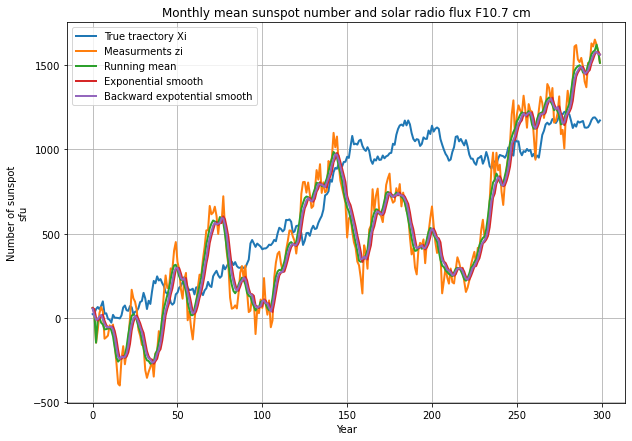

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(x, linewidth = 2)
plt.plot(z, linewidth = 2)
plt.plot(mean_smooth(M, z), linewidth = 2)
plt.plot(exp_smooth(alp, z), linewidth = 2)
plt.plot(backward_exp_smooth(alp, exp_smooth(alp, z)), linewidth = 2)
plt.grid()
plt.ylabel('Number of sunspot\nsfu')
plt.xlabel('Year')
plt.legend(['True traectory Xi', 'Measurments zi', 'Running mean', 'Exponential smooth', 'Backward expotential smooth'])
plt.title('Monthly mean sunspot number and solar radio flux F10.7 cm')

In [13]:
print(deviation_indicator(z, exp_smooth(alp, z)))
print(deviation_indicator(z, backward_exp_smooth(alp, exp_smooth(alp, z))))
print(deviation_indicator(z, mean_smooth(M, z)))

3401419.725697812
2396473.3735390496
1524122.0951772525


In [14]:
print(variability_indicator(exp_smooth(alp, z)))
print(variability_indicator(mean_smooth(M, z)))
print(variability_indicator(backward_exp_smooth(alp, exp_smooth(alp, z))))

214396.87129388753
292297.3116306887
122748.67238843608


In [15]:
# PART 2
x0 = 5
v0 = 0
T = 0.1
sigmaa_2 = 10
numb = 300
v,a = gnerate_vel_and_ac(0, sigmaa_2 ** 0.5, T, v0, numb)
x = generate_x(T, x0, a, v)

In [16]:
sigmaeta_2 = 500
eta = np.random.normal(0, sigmaeta_2 ** 0.5, 300)
z = x + eta

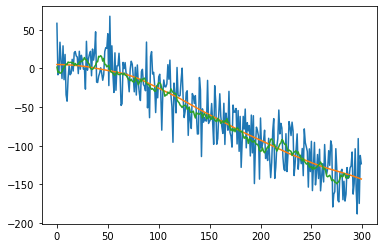

In [17]:
M = 13
plt.plot(z)
plt.plot(x)
plt.plot(mean_smooth(M, z)[6:len(z) - 6])

In [77]:
print(np.std(mean_smooth(M, z)[6:len(z) - 6] - z[6:len(z)-6]))
print(np.std(mean_smooth(M, z)[6:len(z) - 6] - x[6:len(z)-6]))

2.905881820263531
0.7297608963827398


In [149]:
T = 1
w = 2 * np.pi / T
sinus = np.sin(np.array(np.arange(0, 720, 720 / 300)) / 180 * np.pi * w)

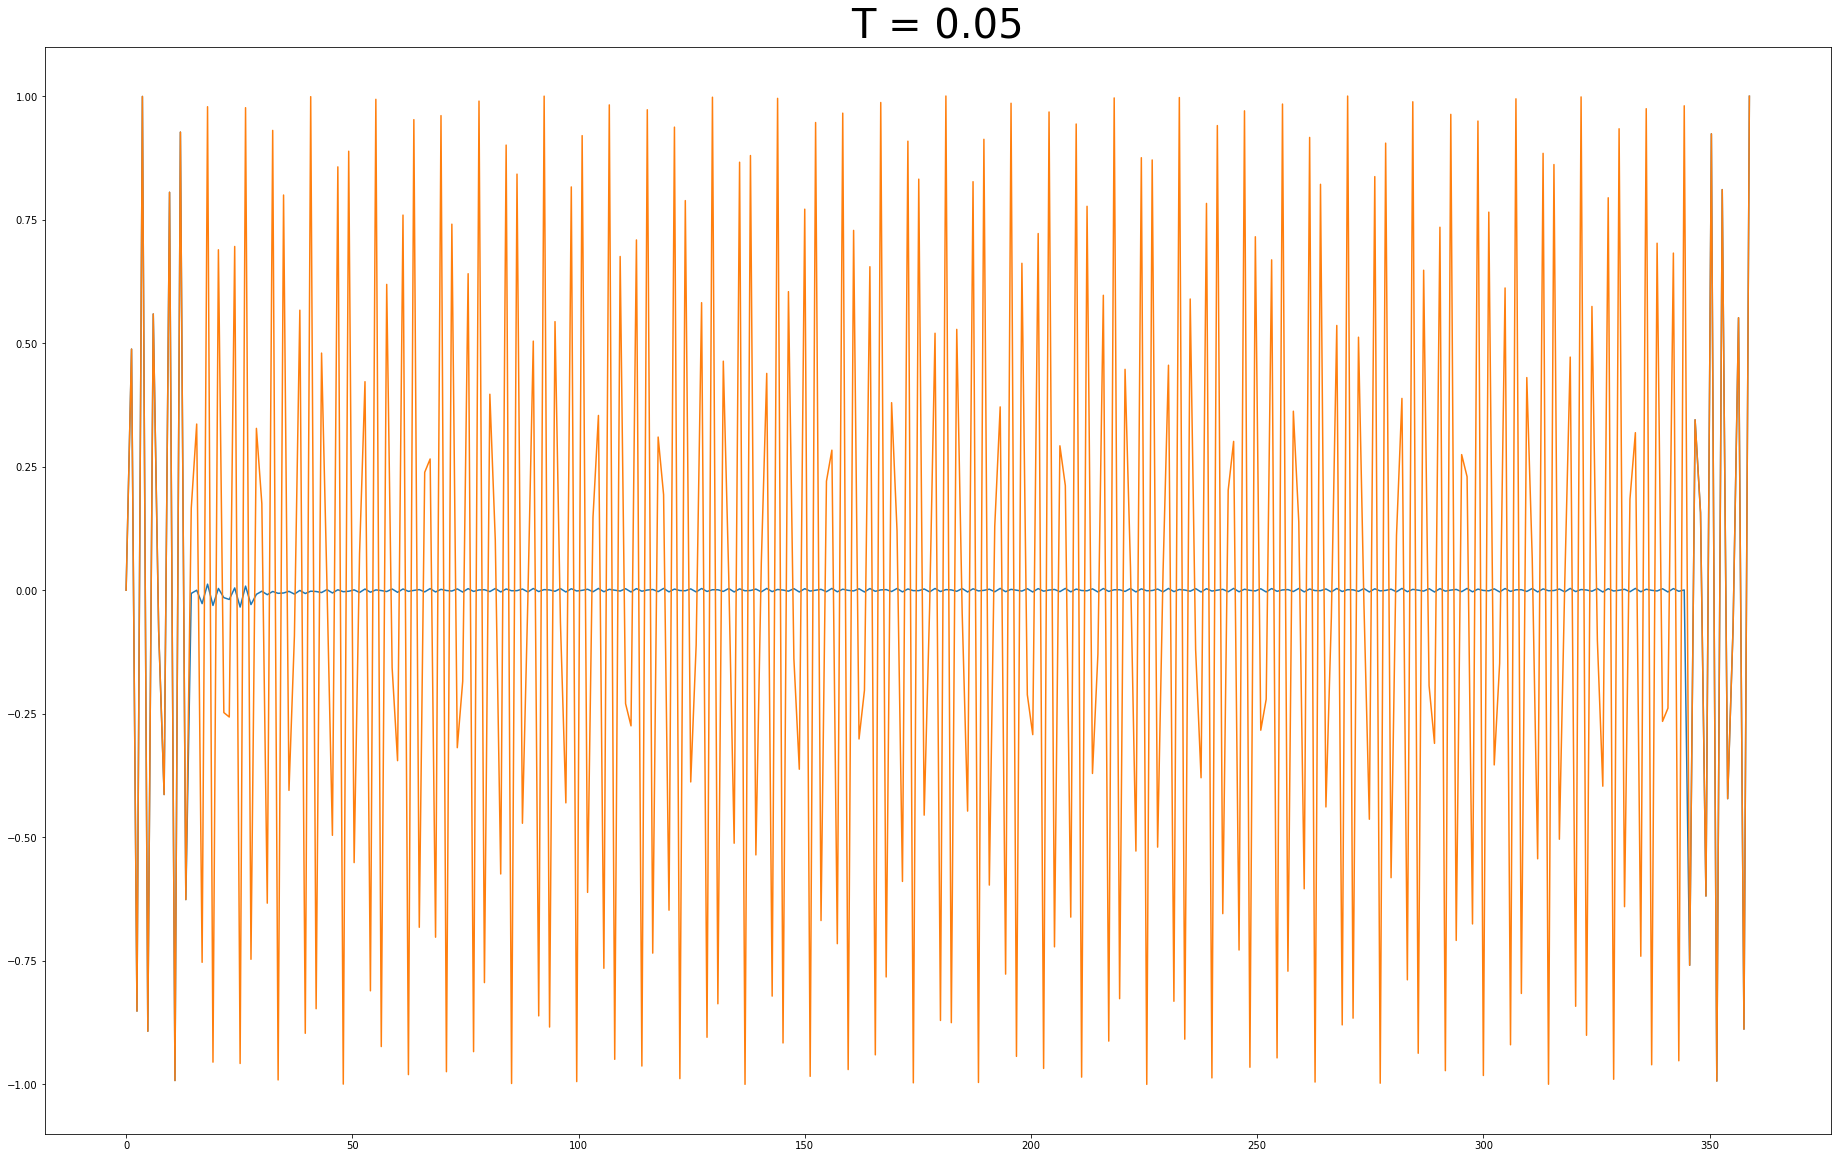

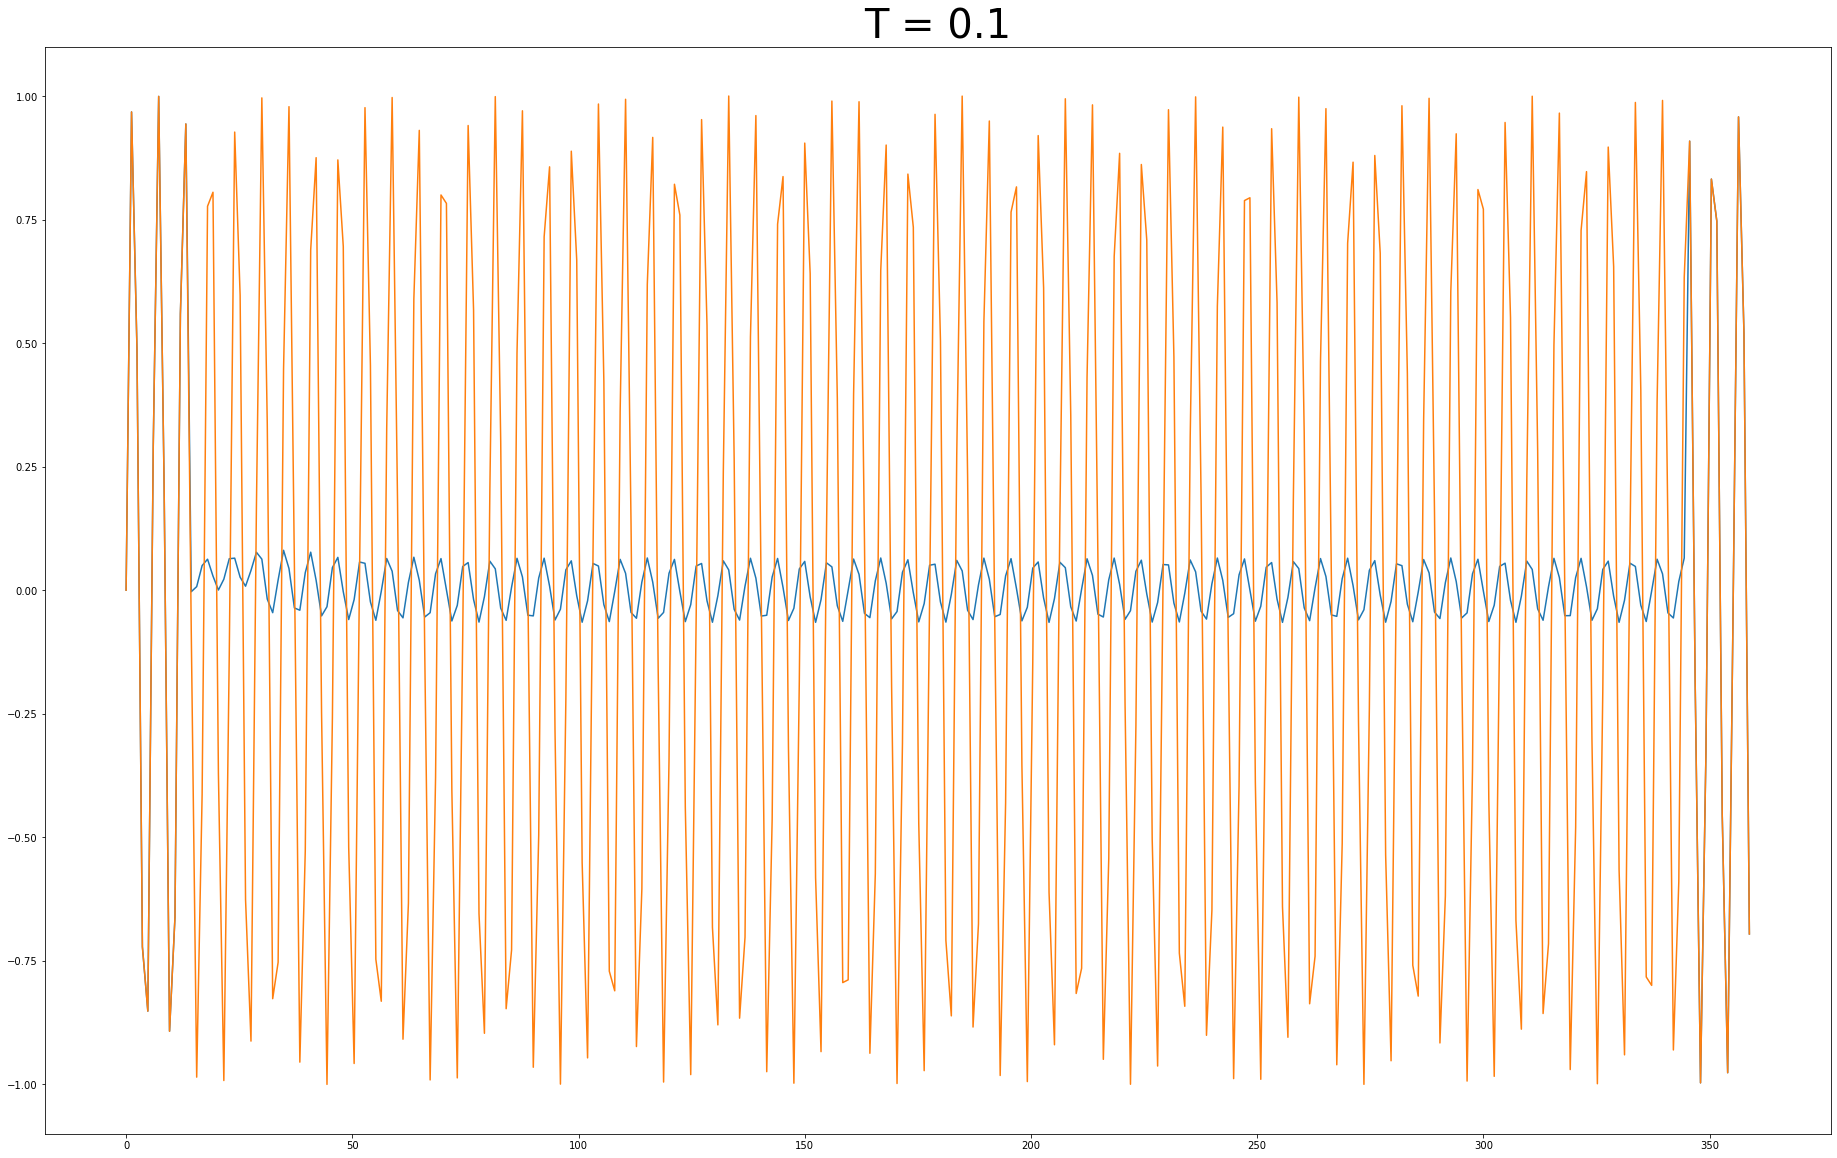

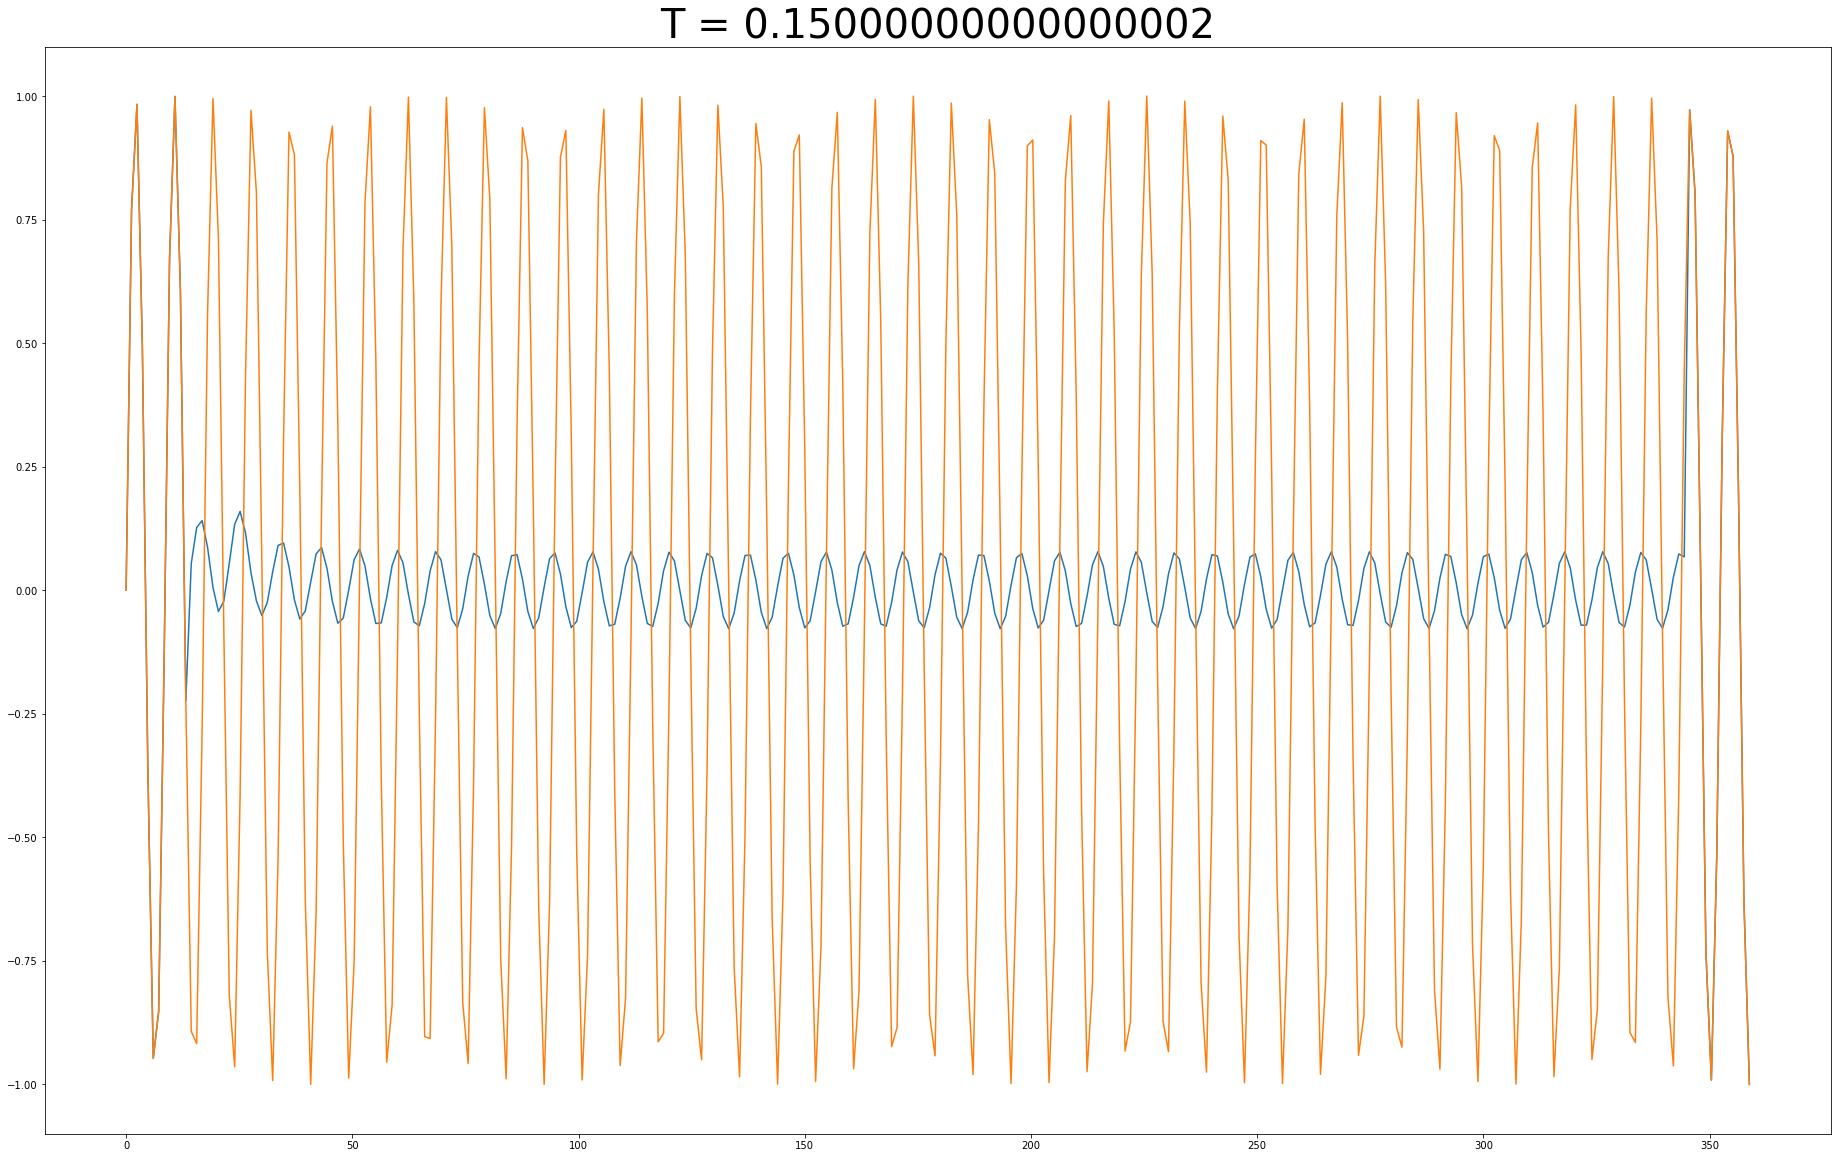

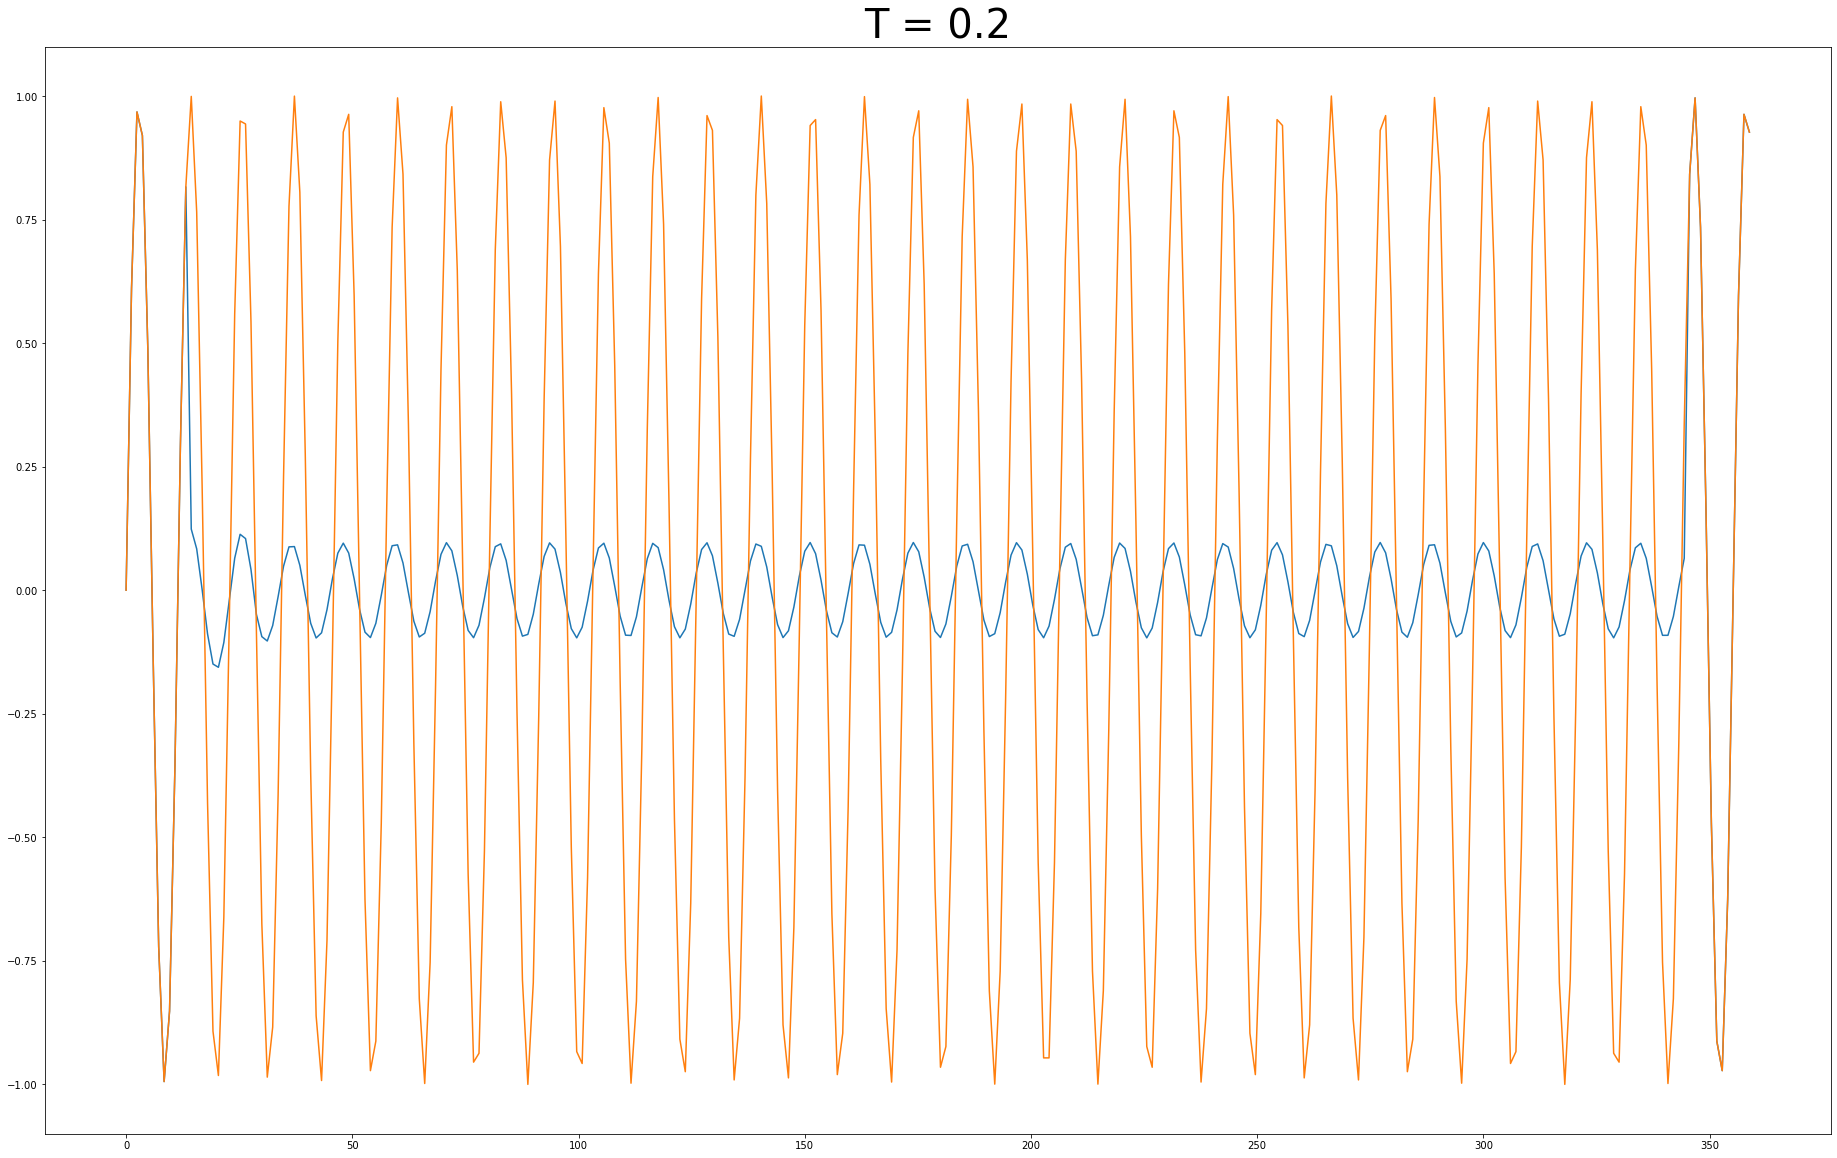

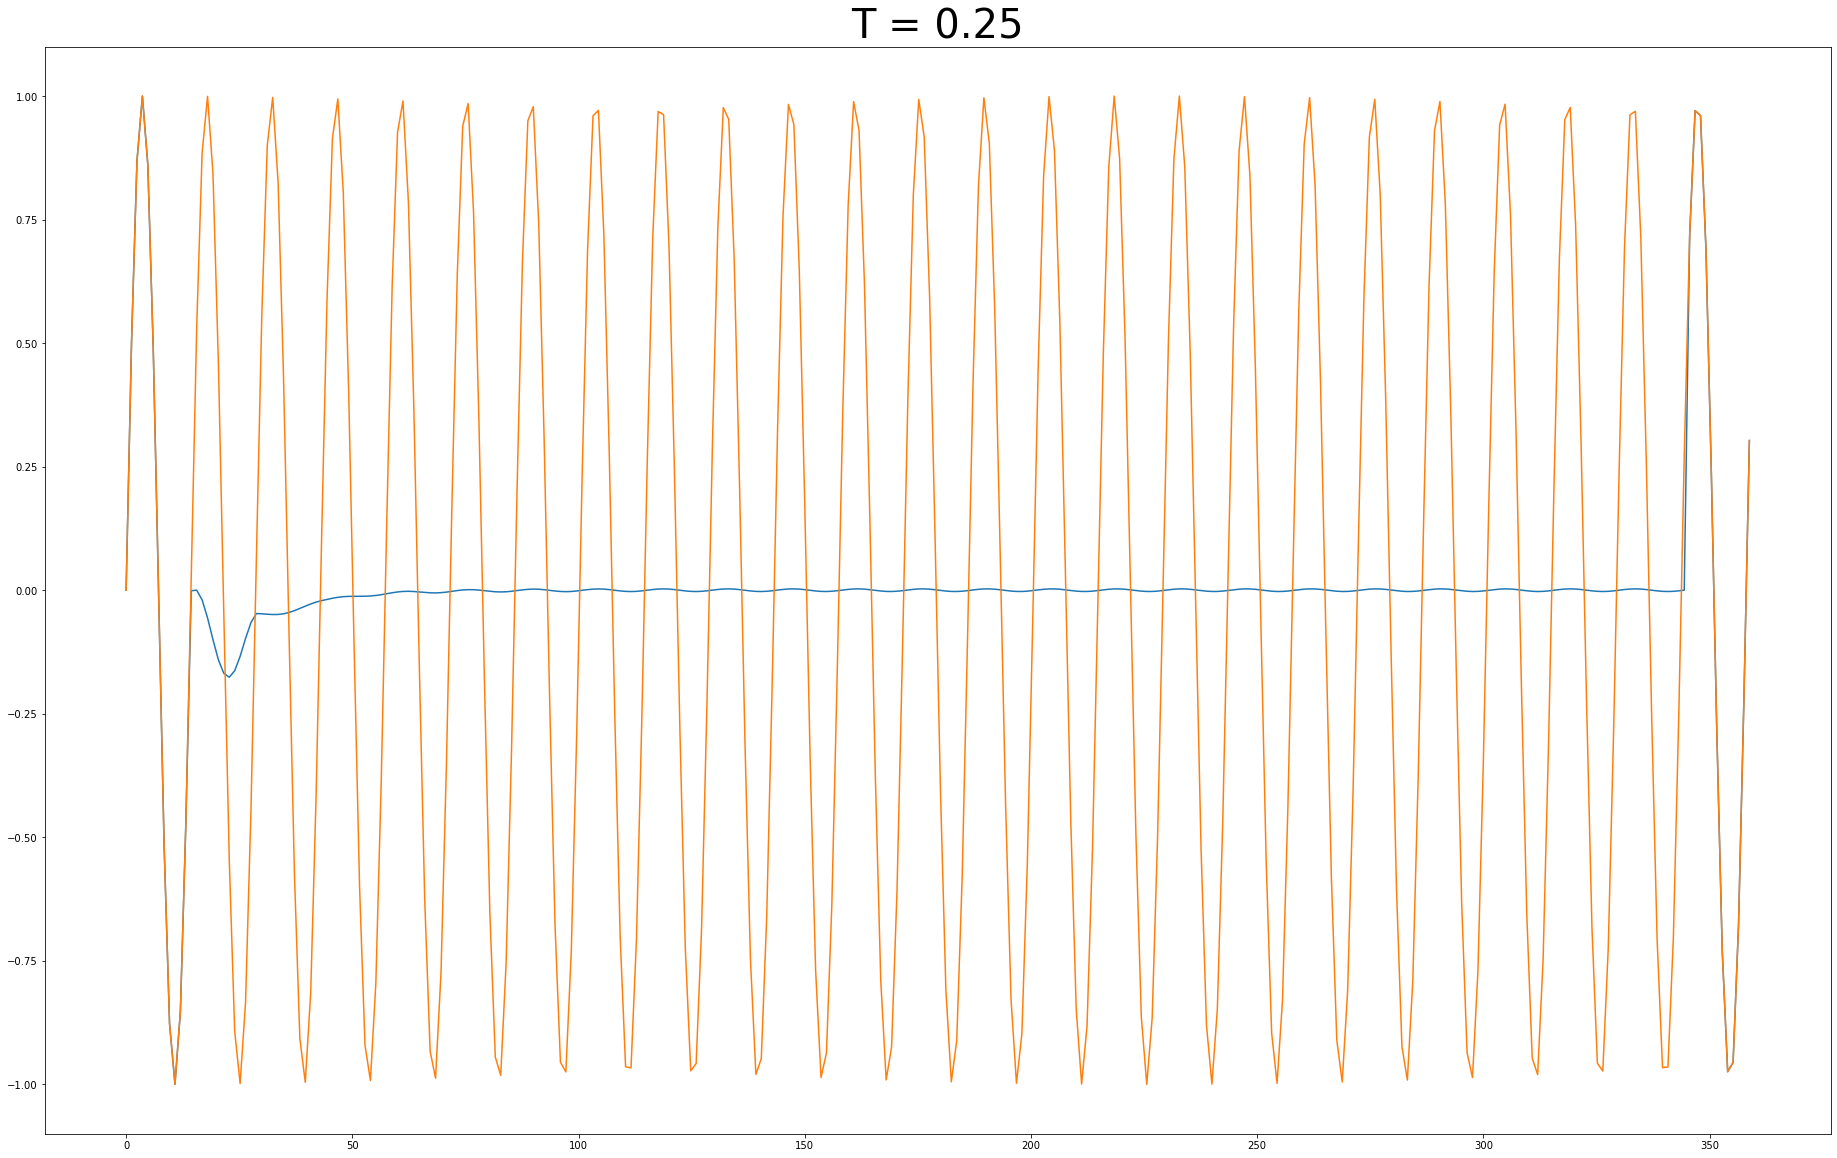

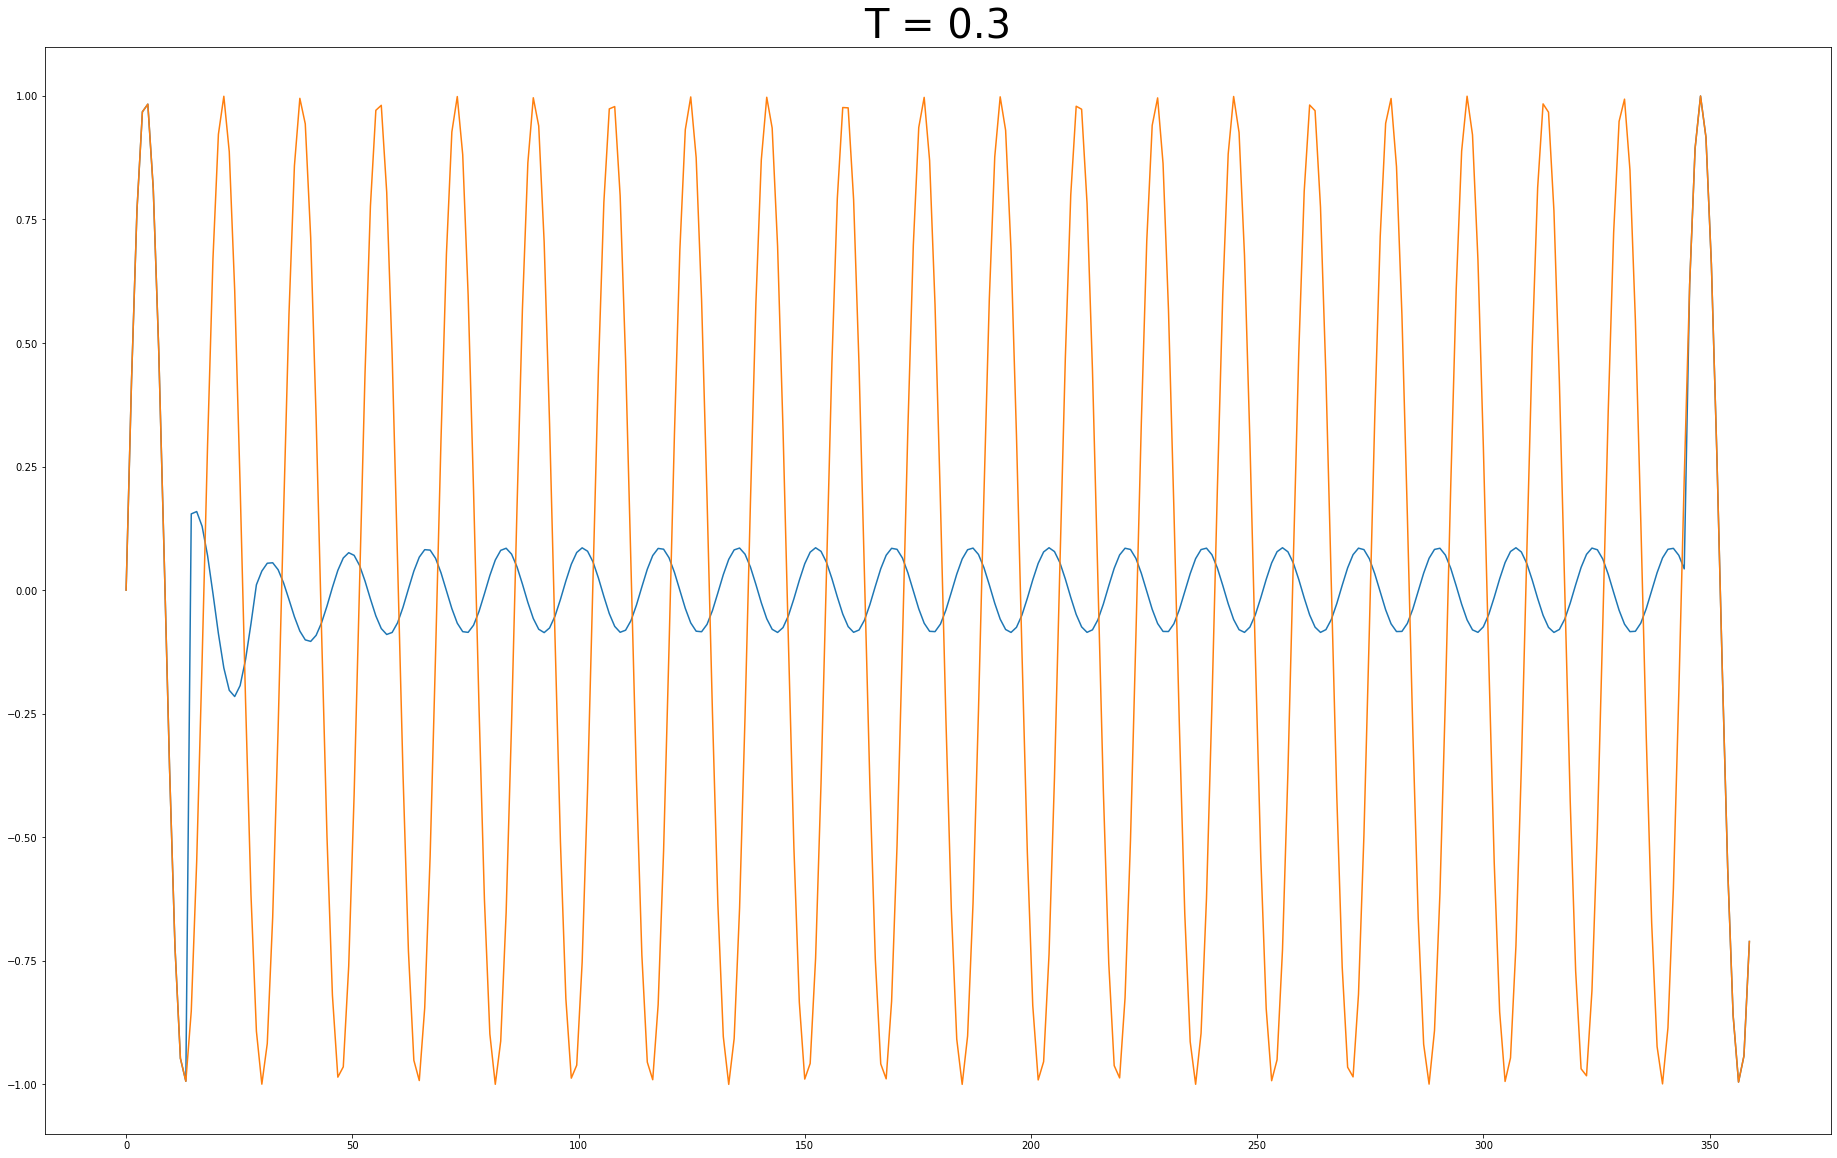

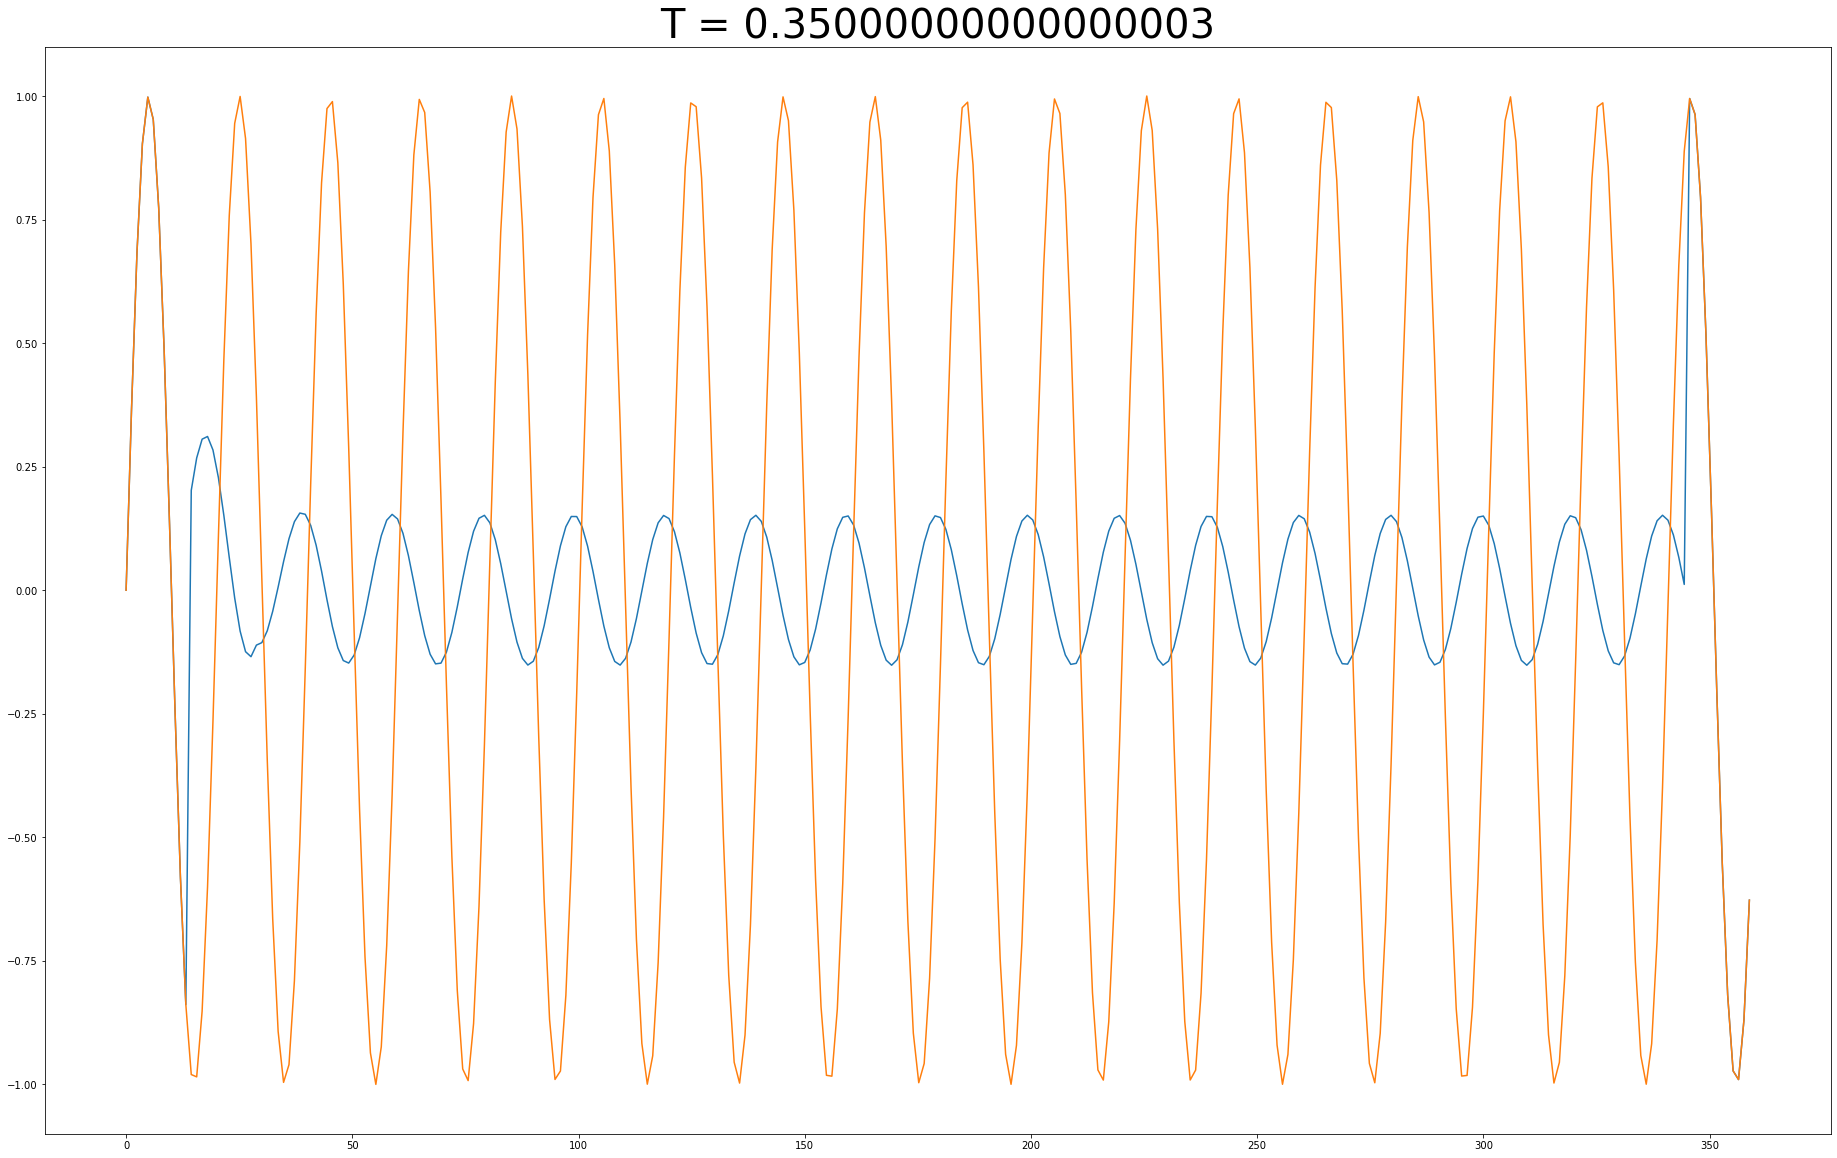

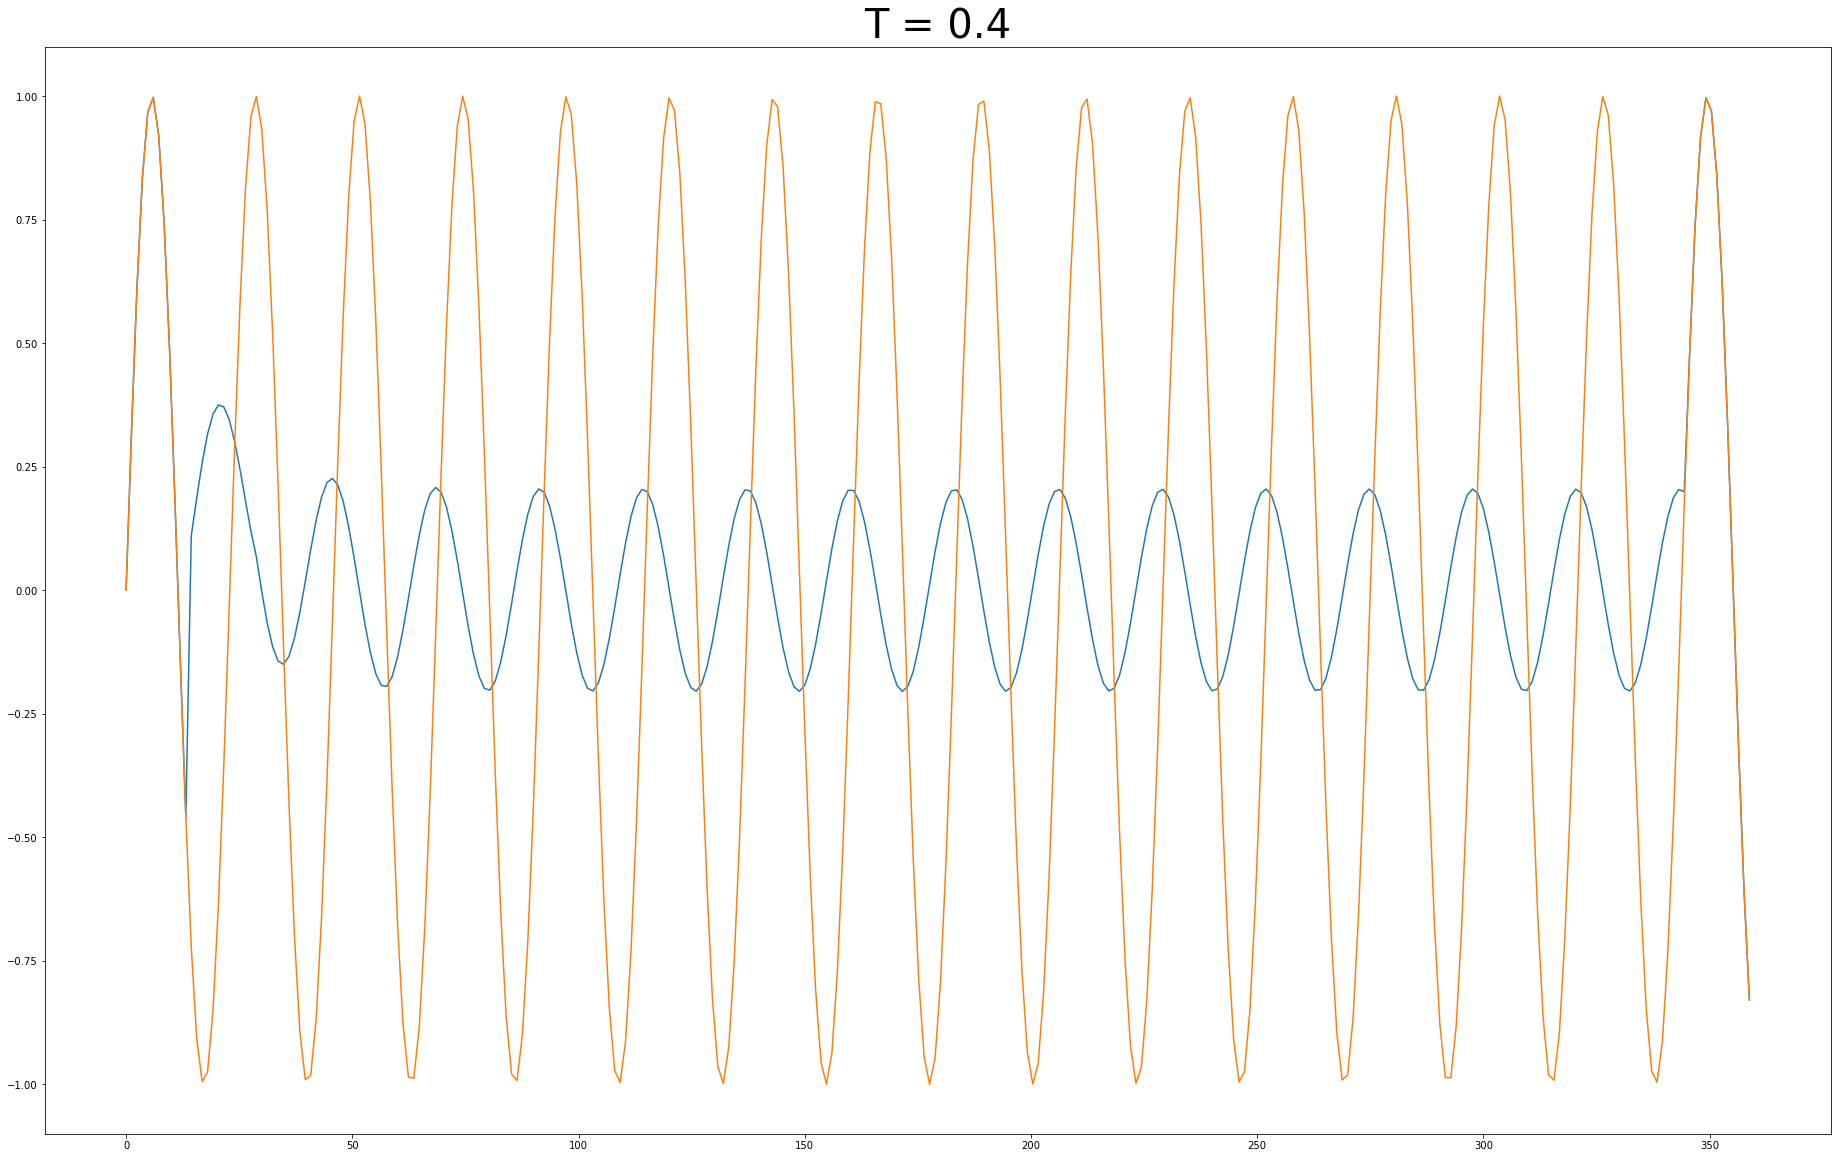

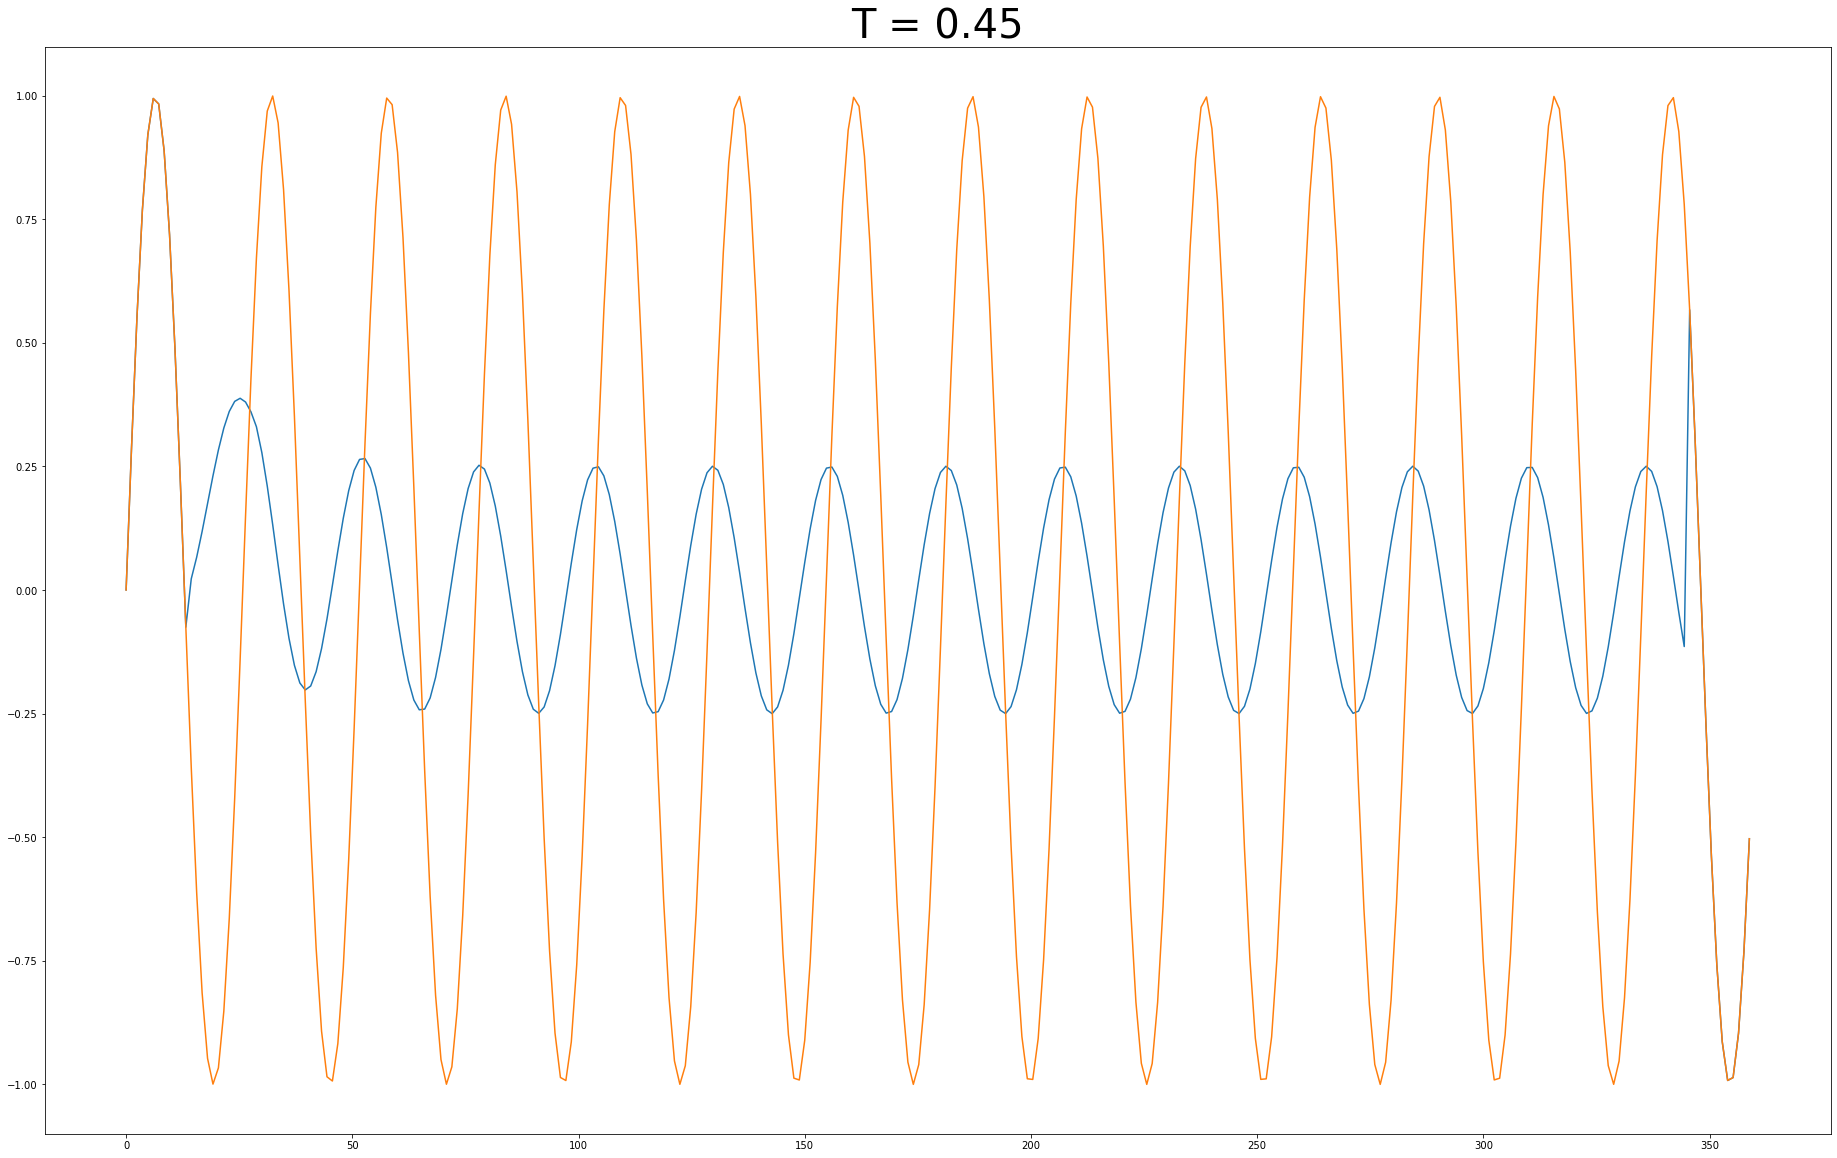

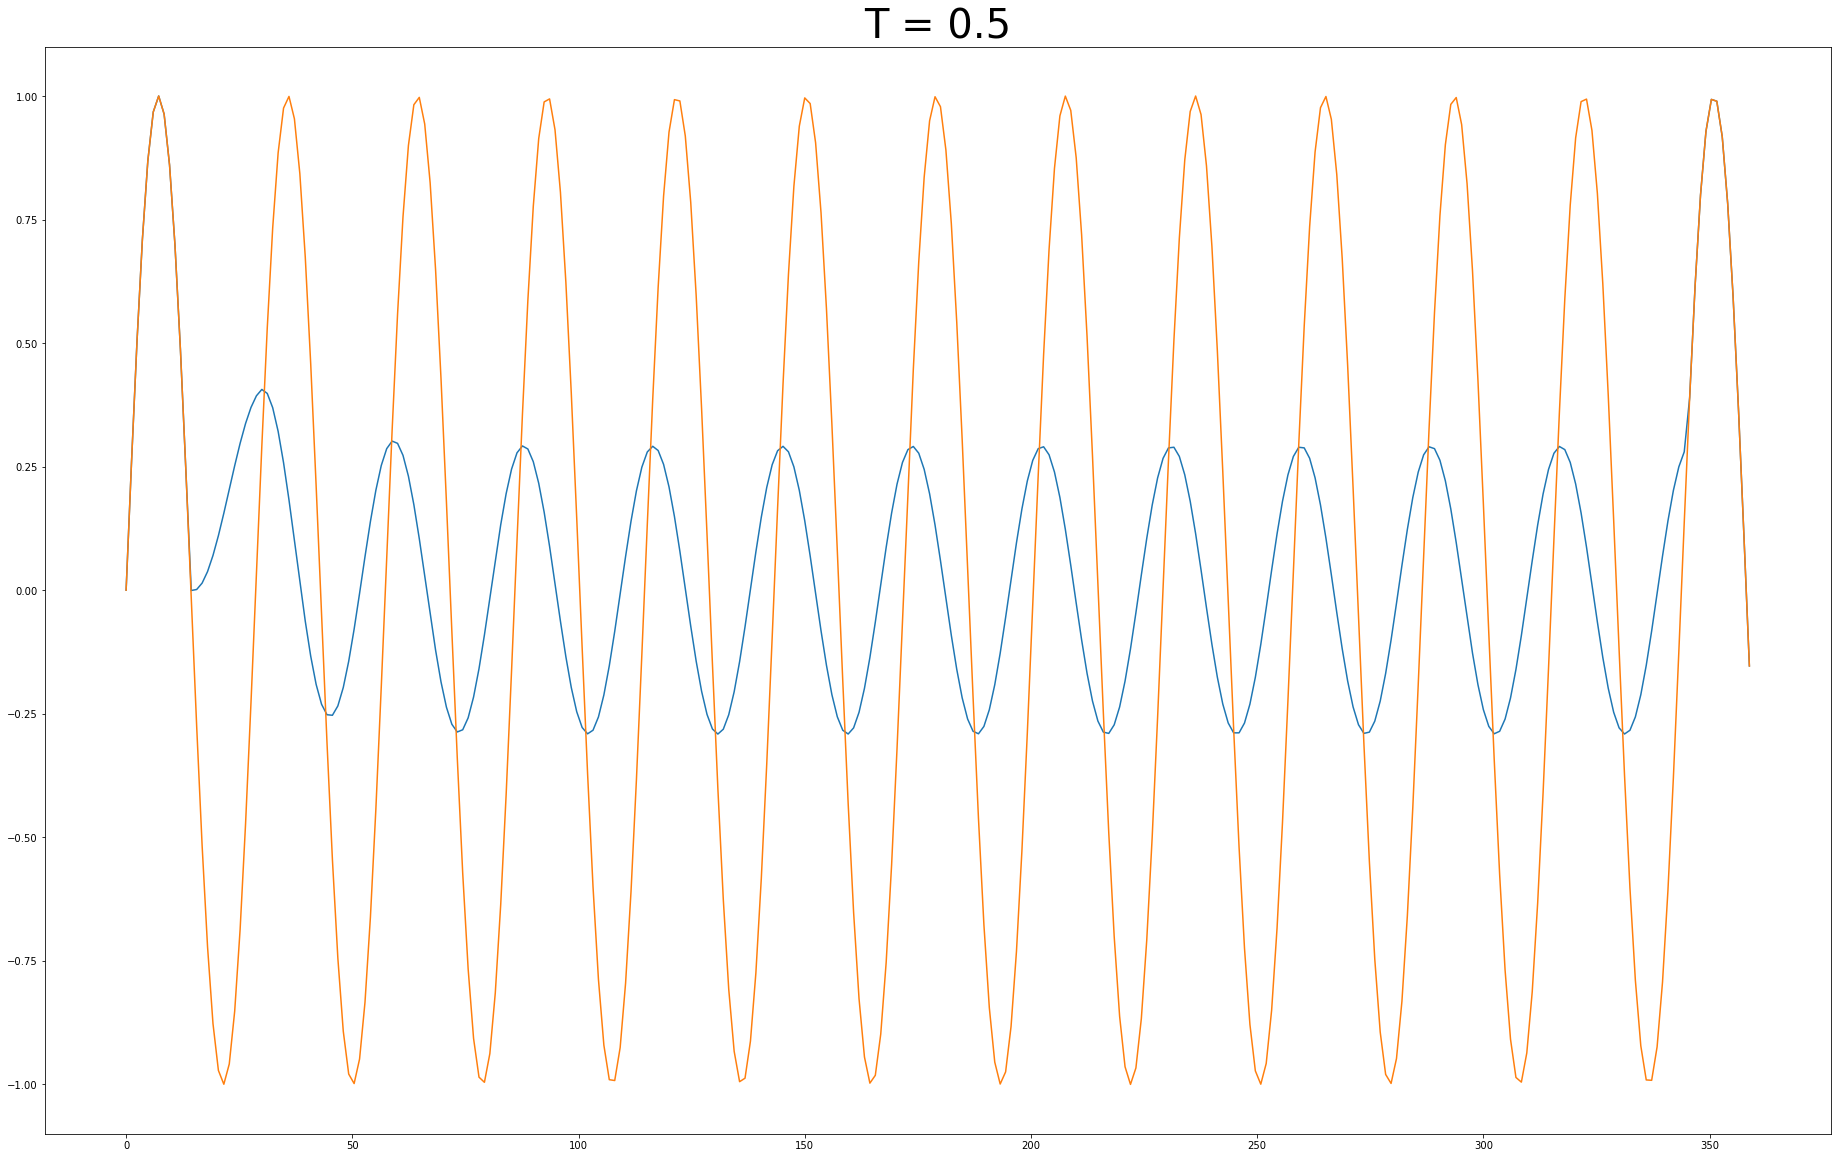

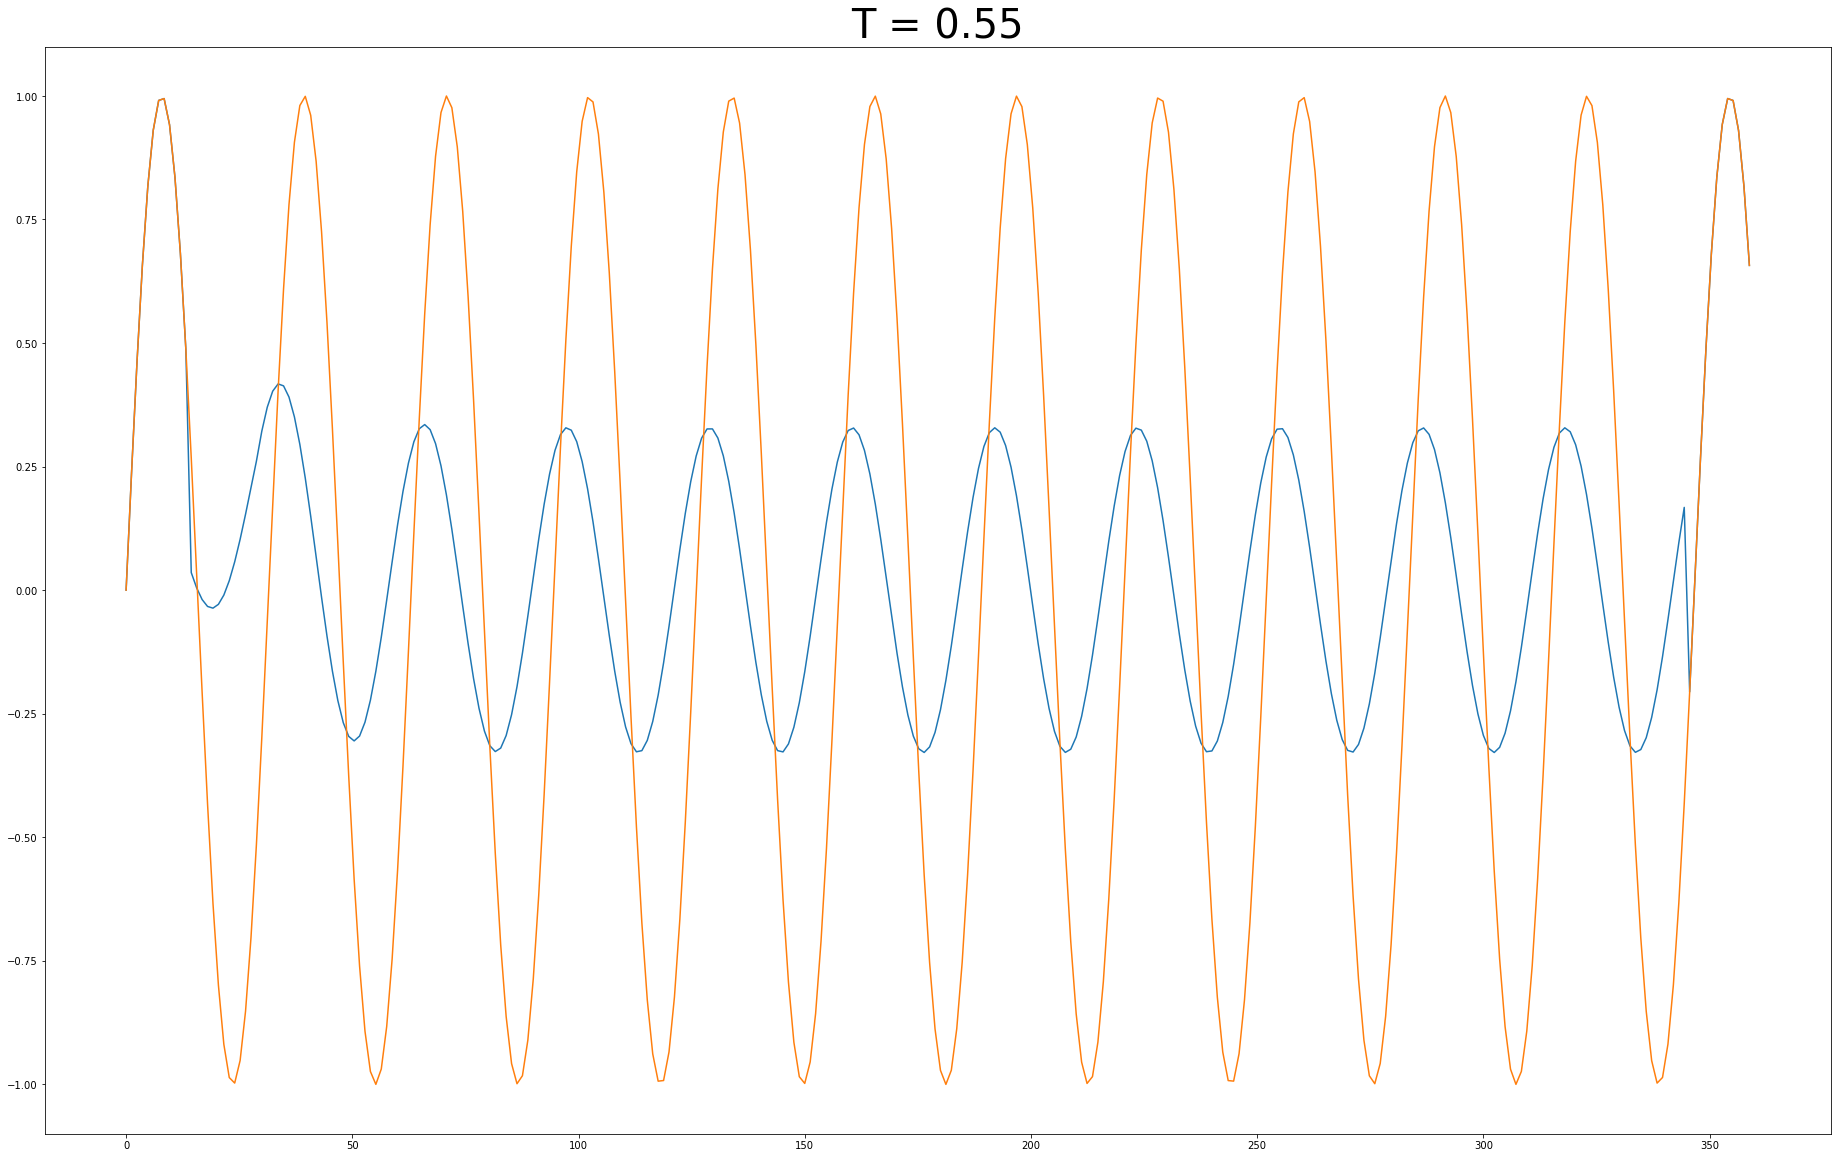

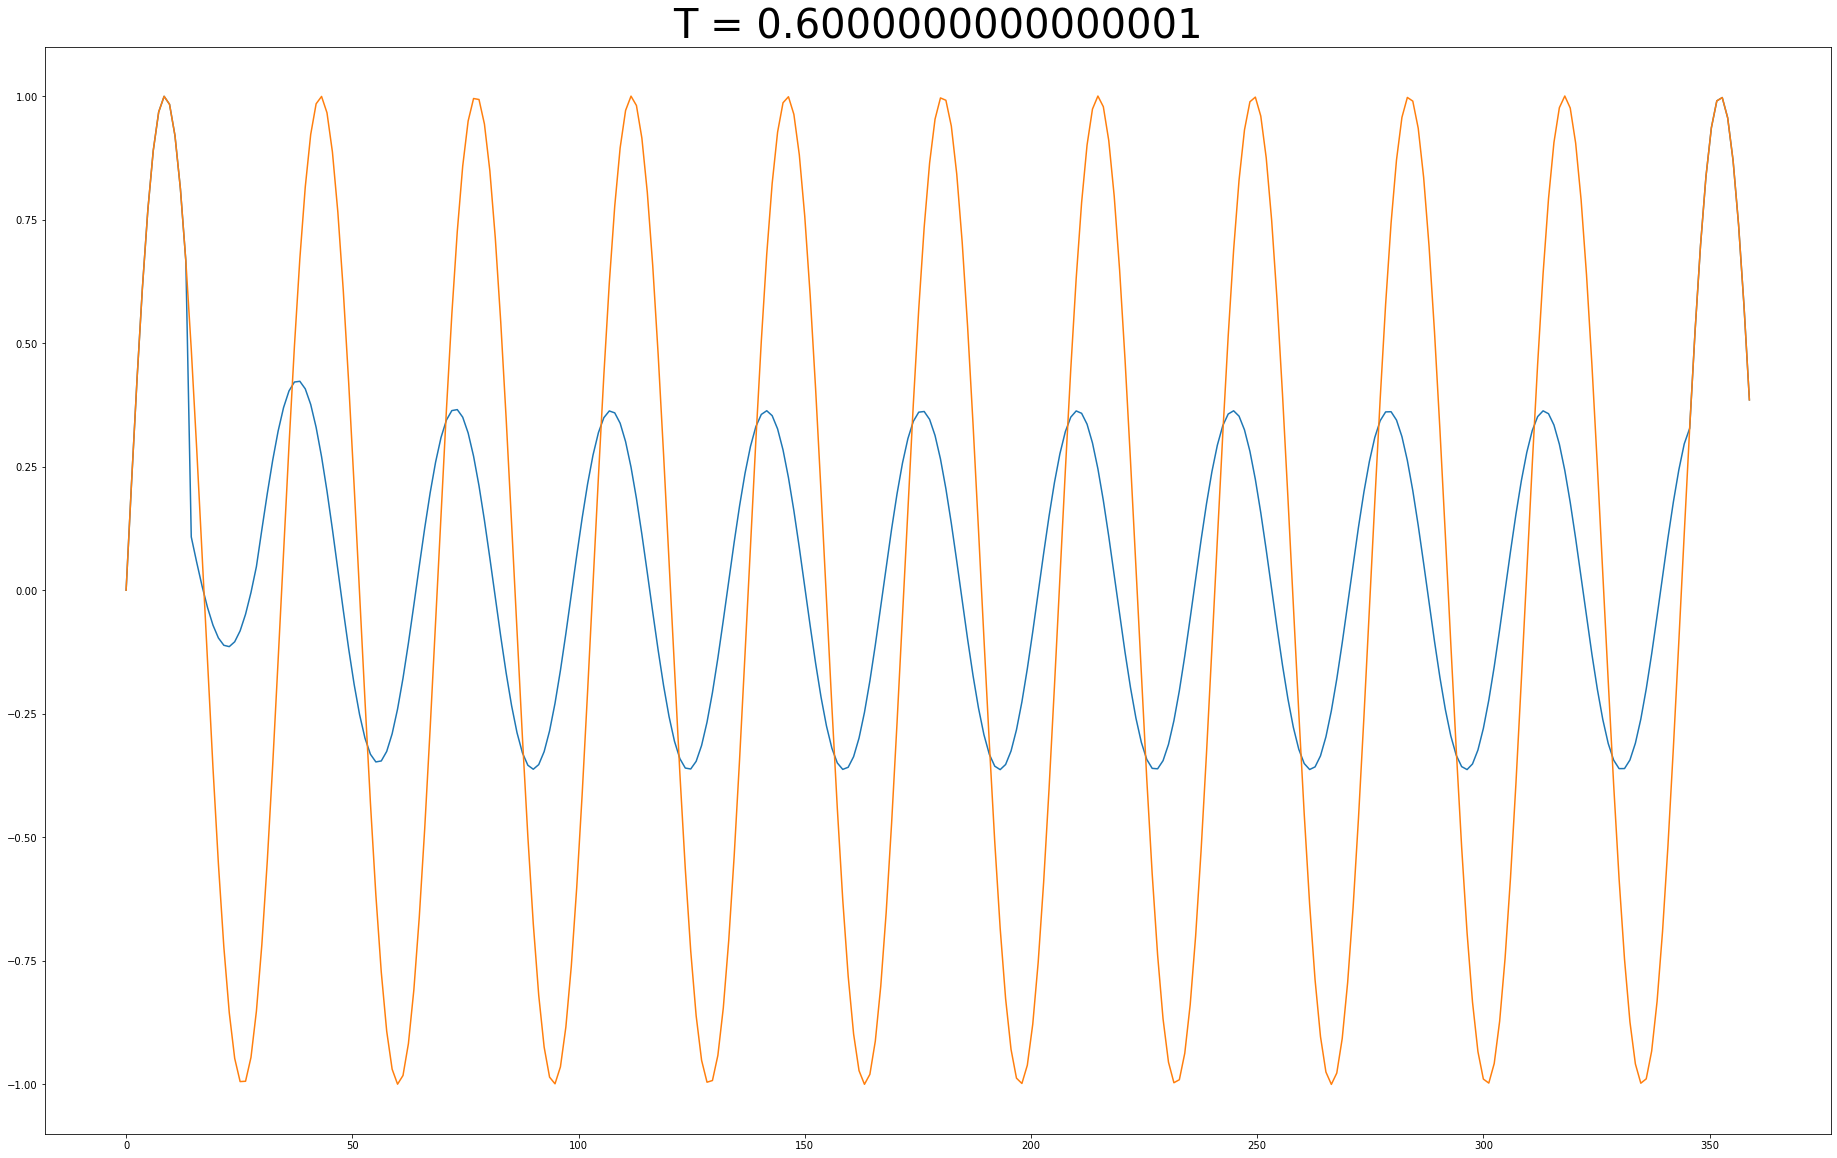

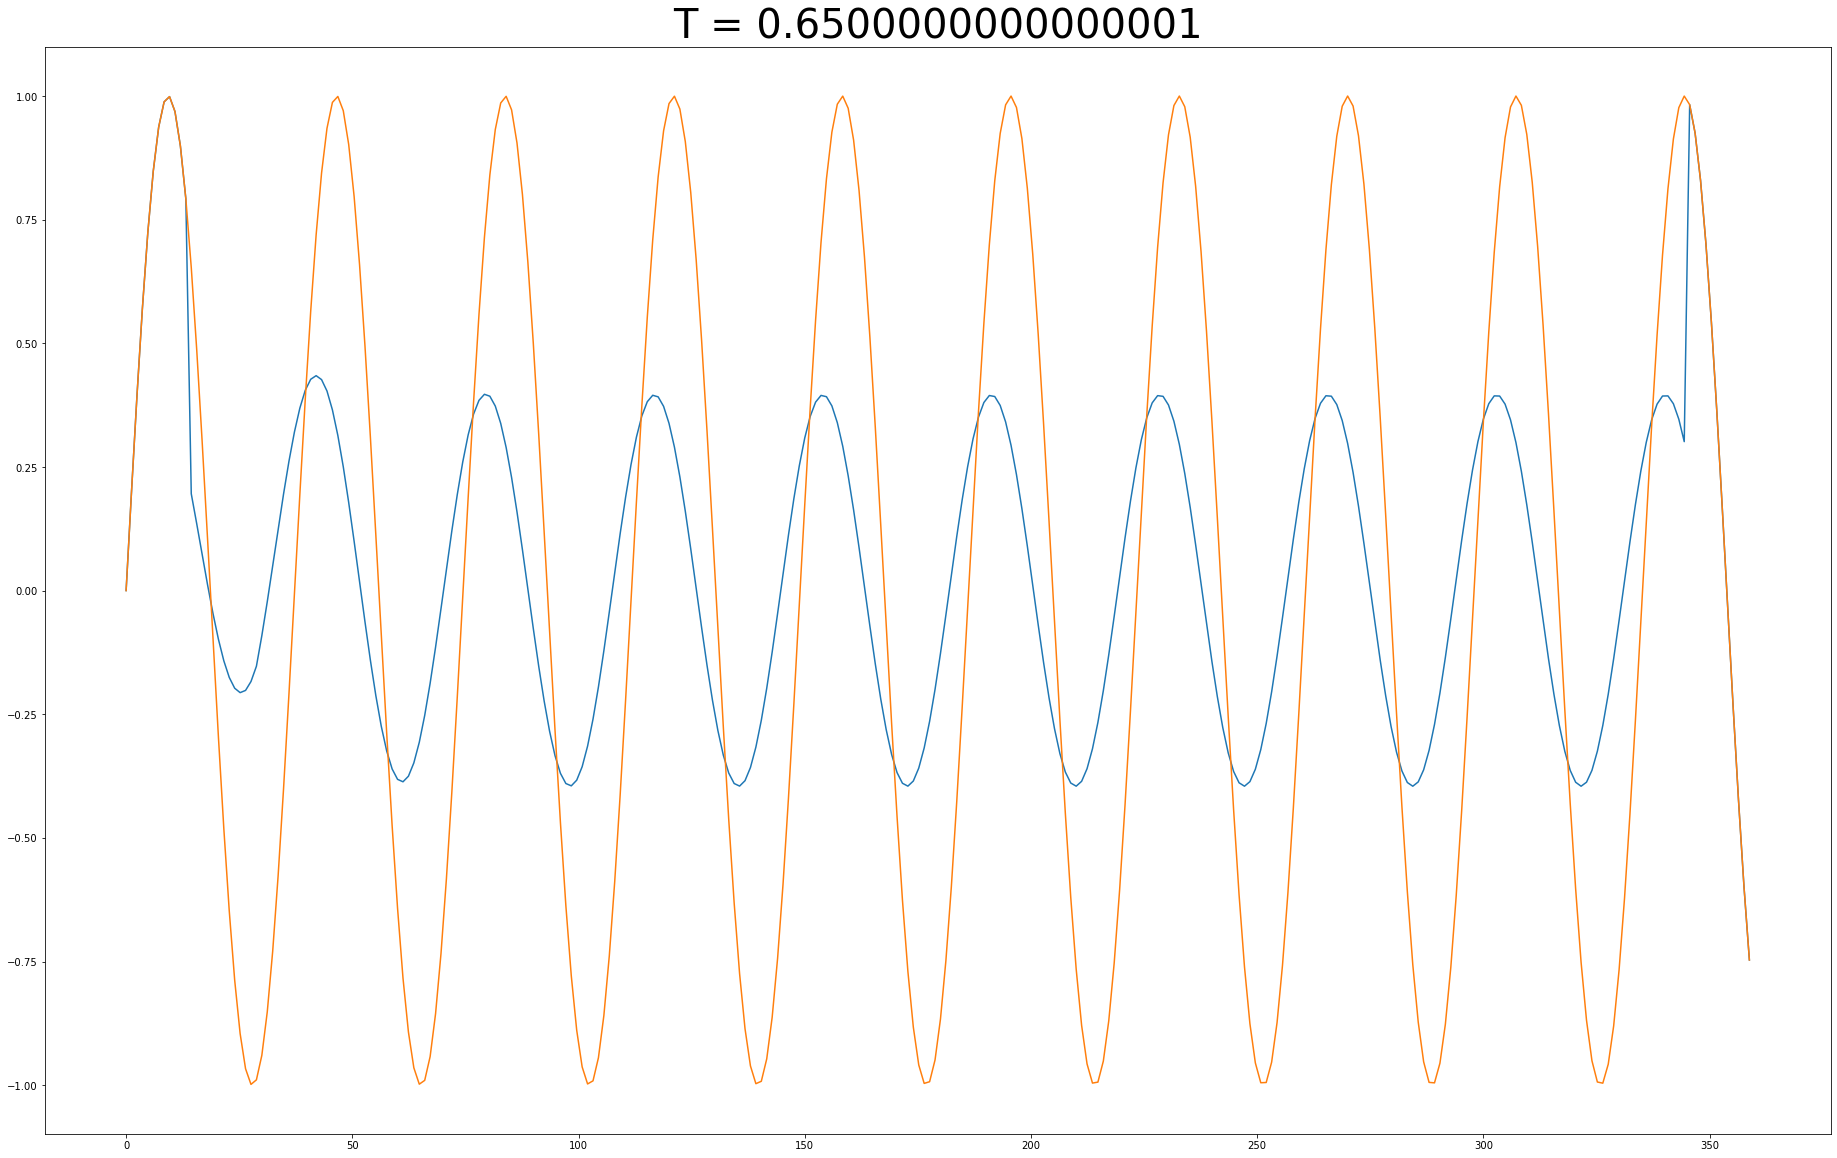

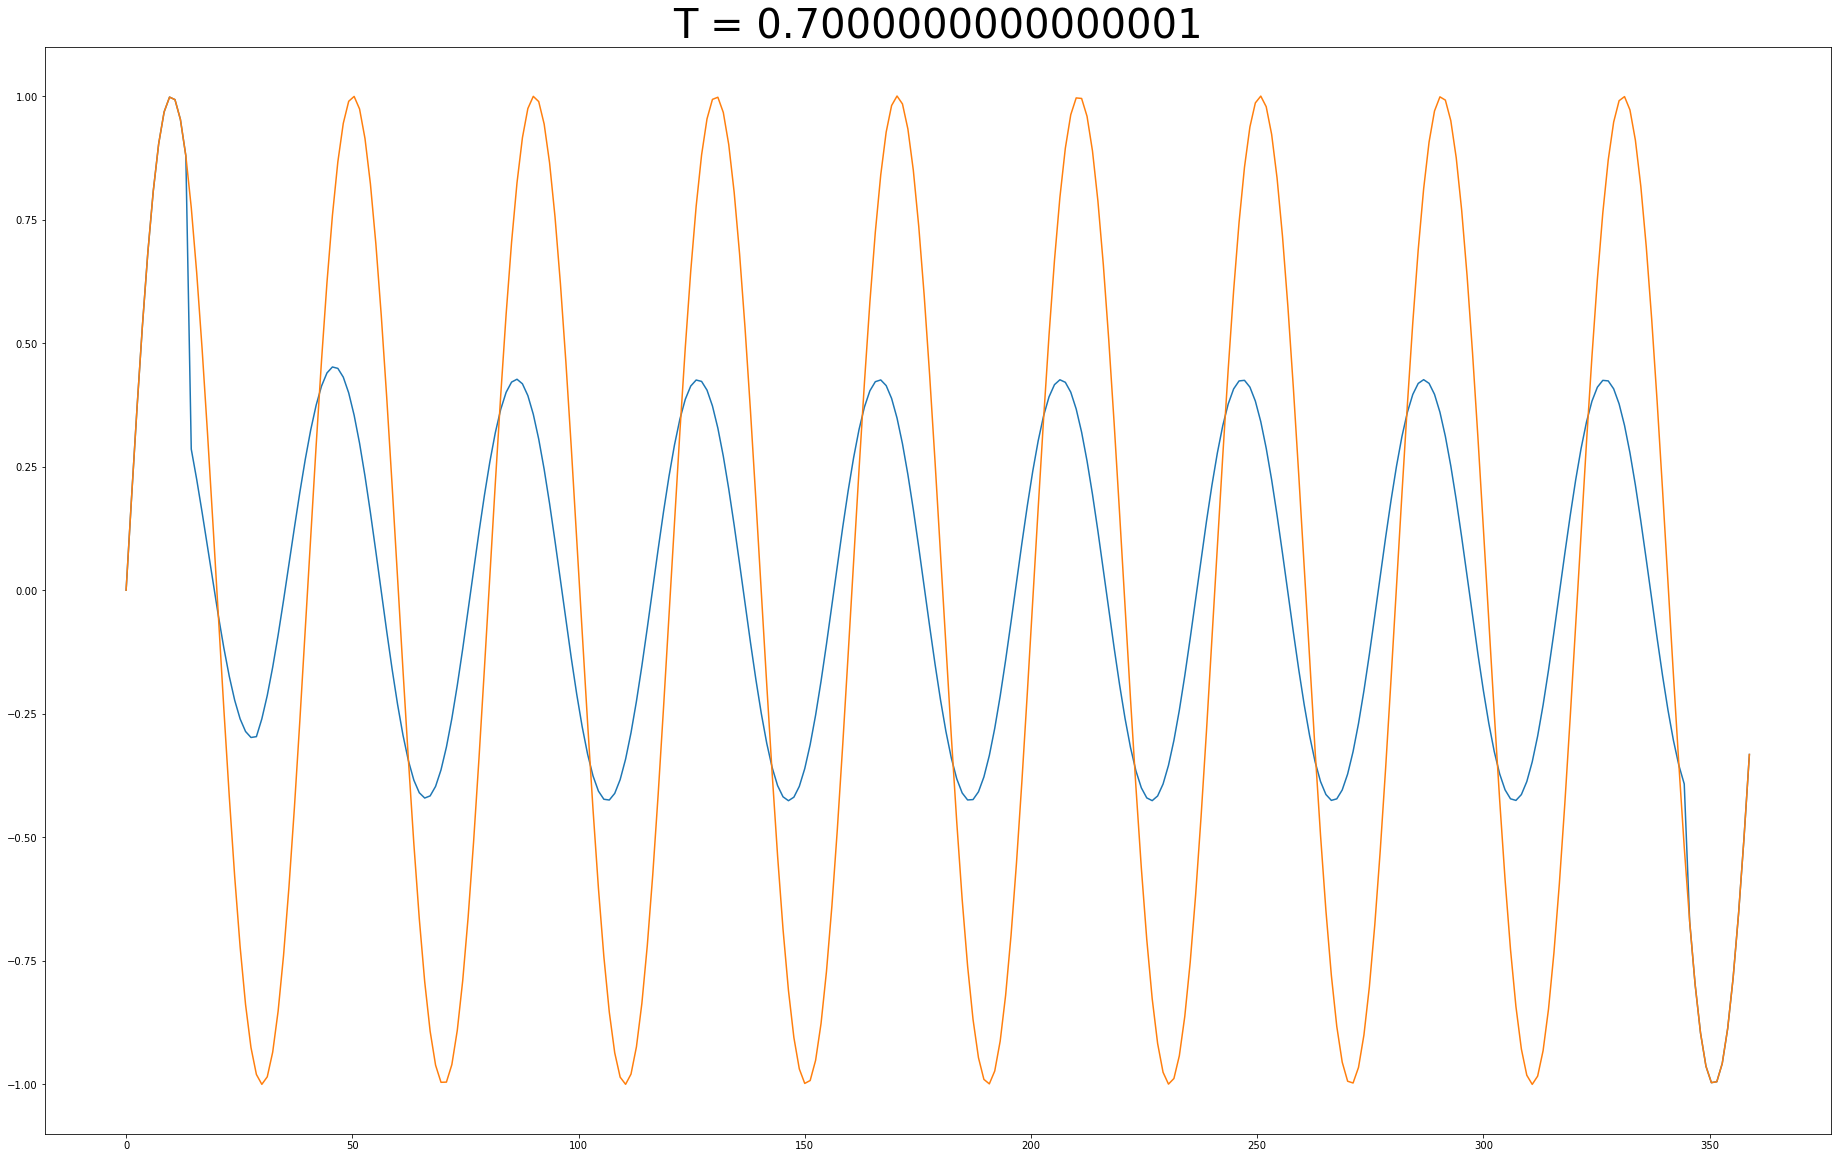

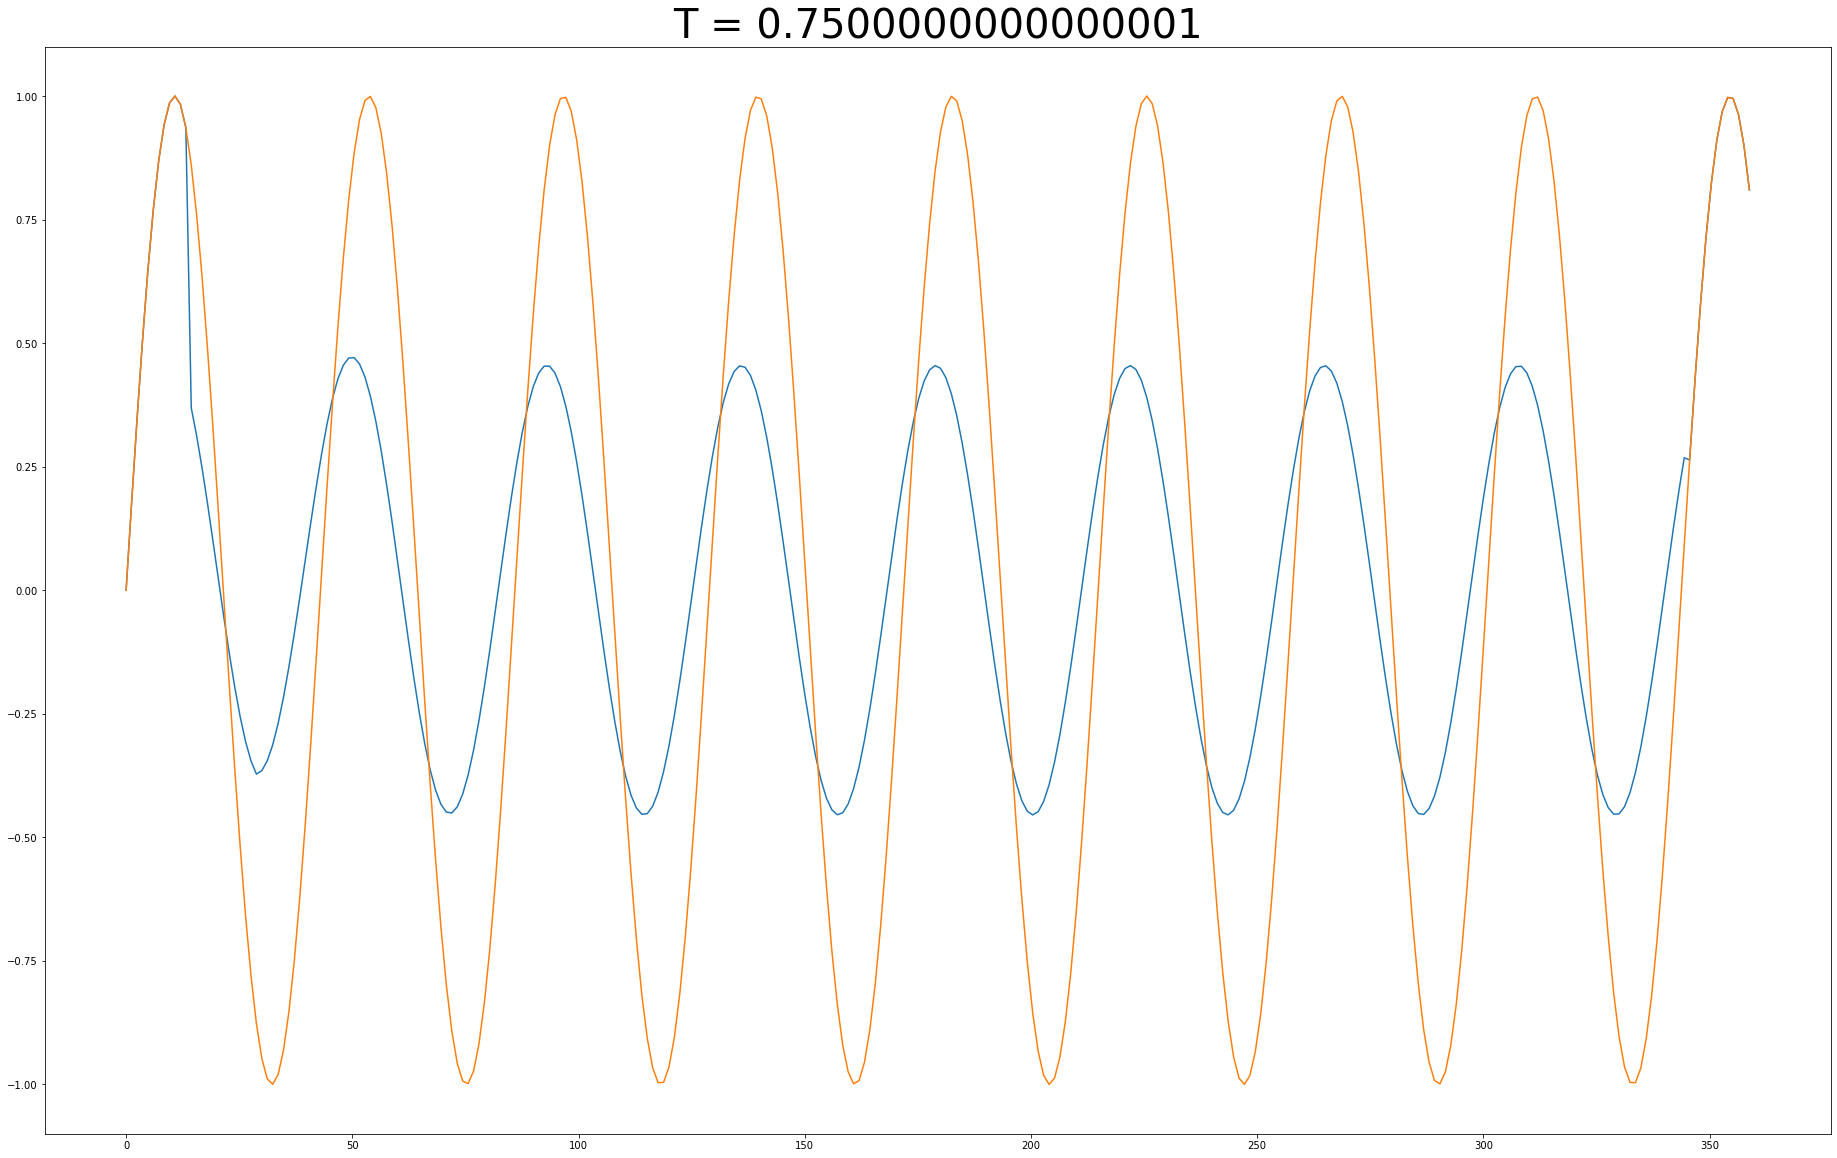

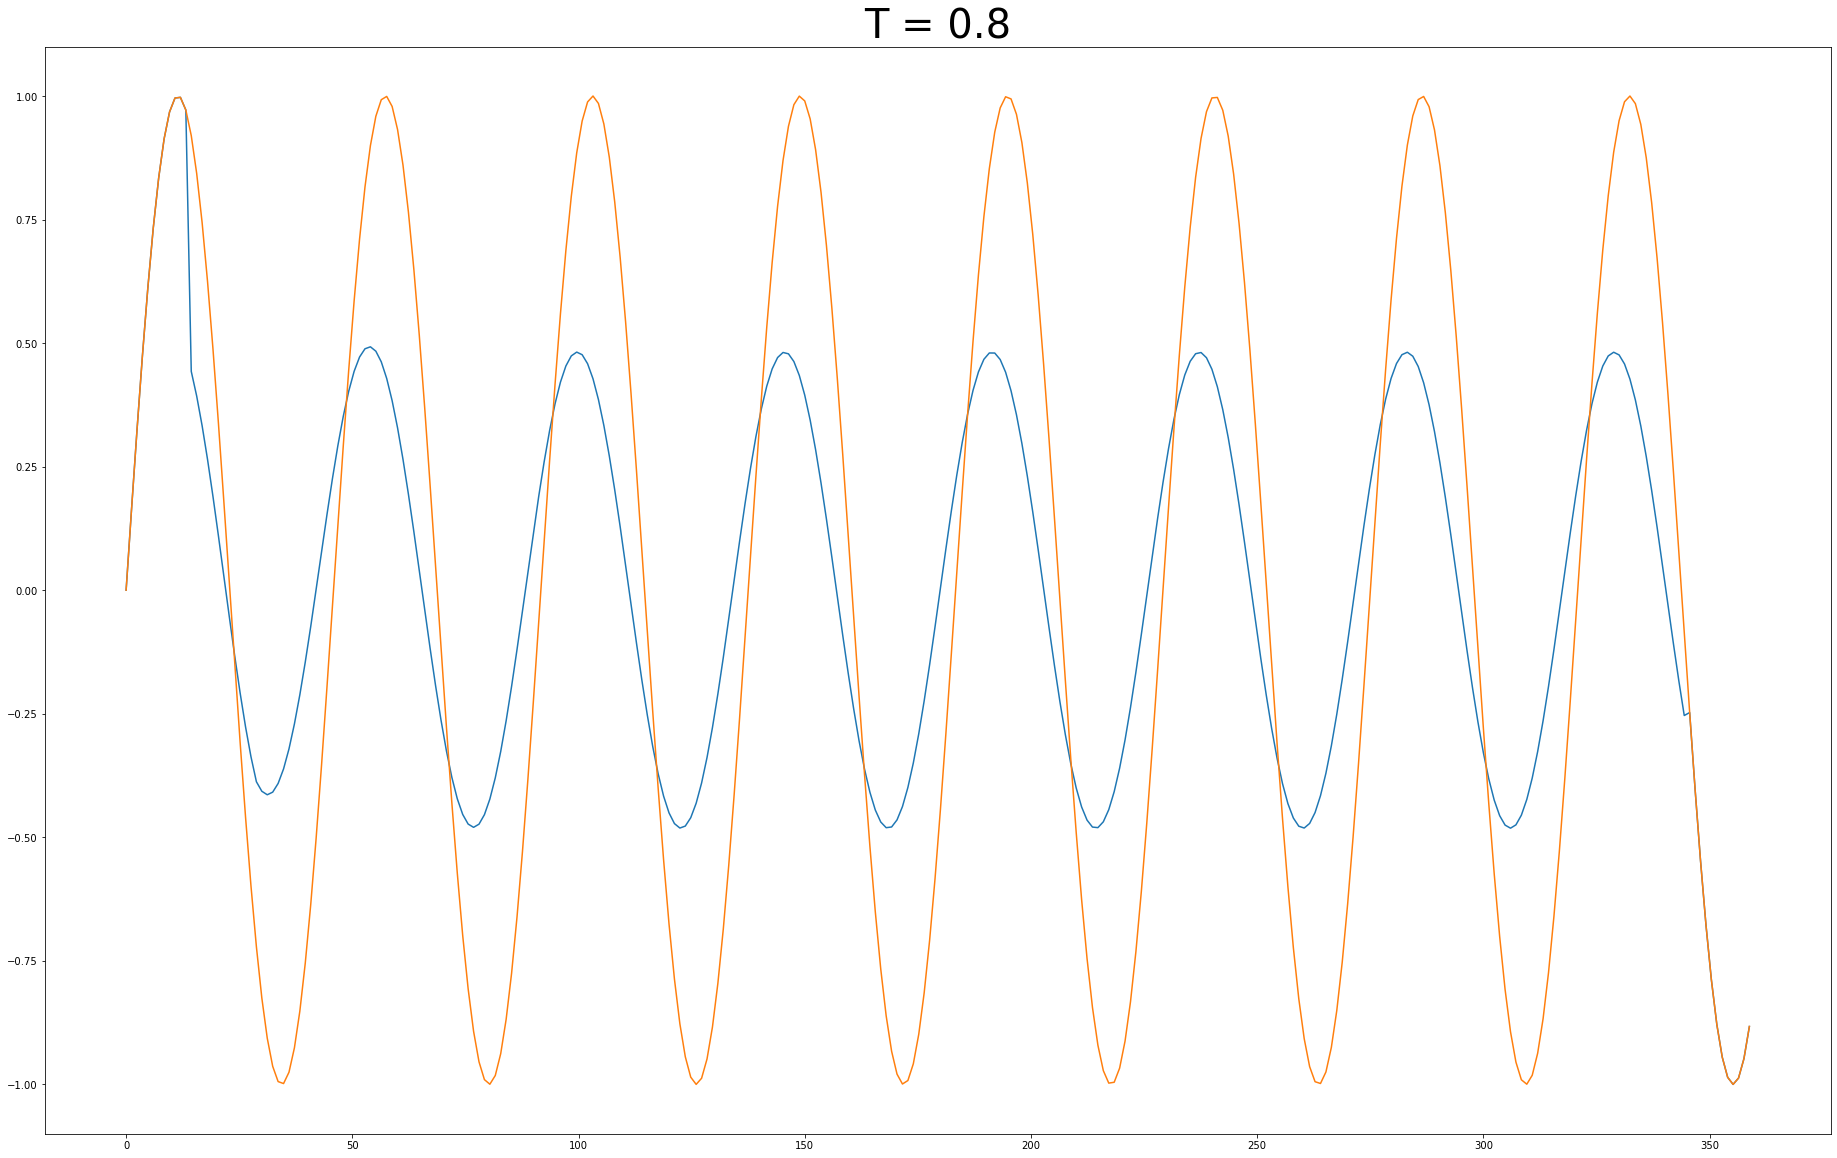

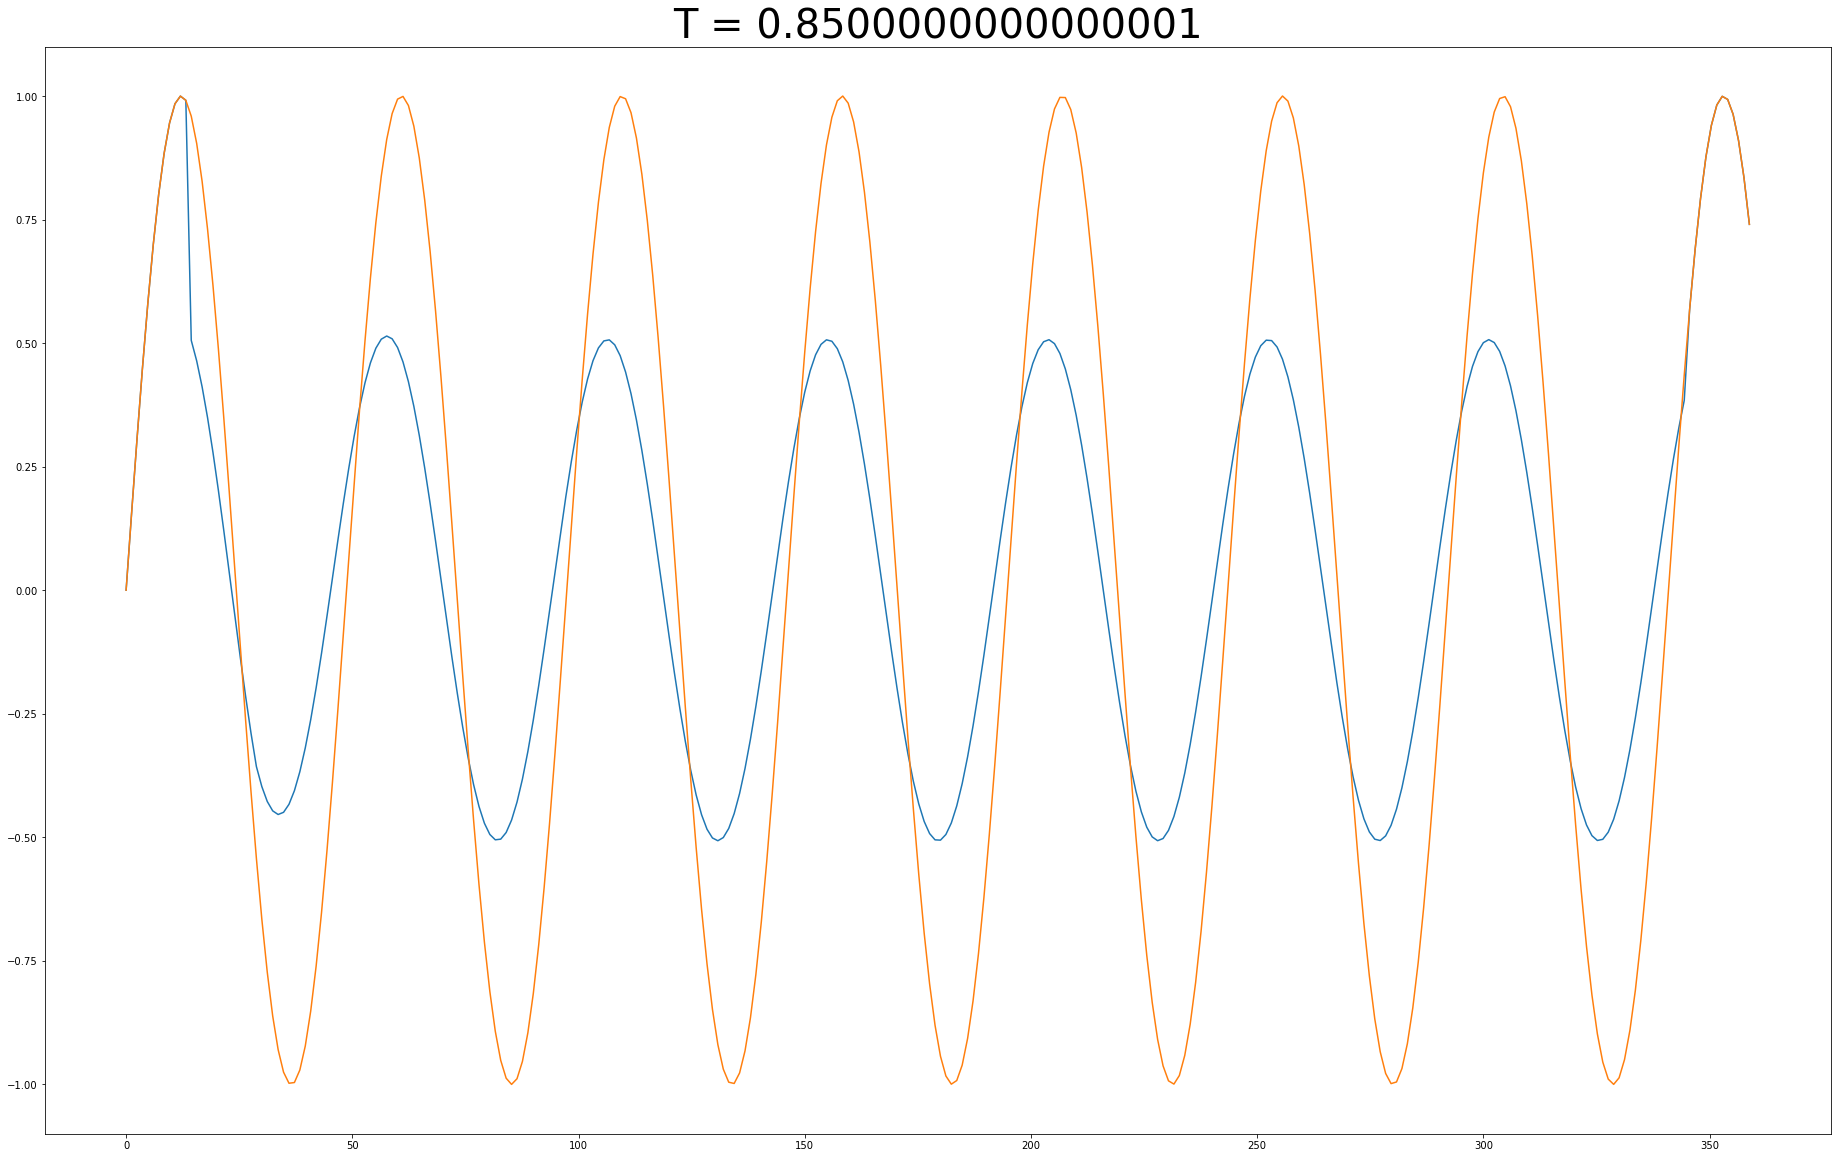

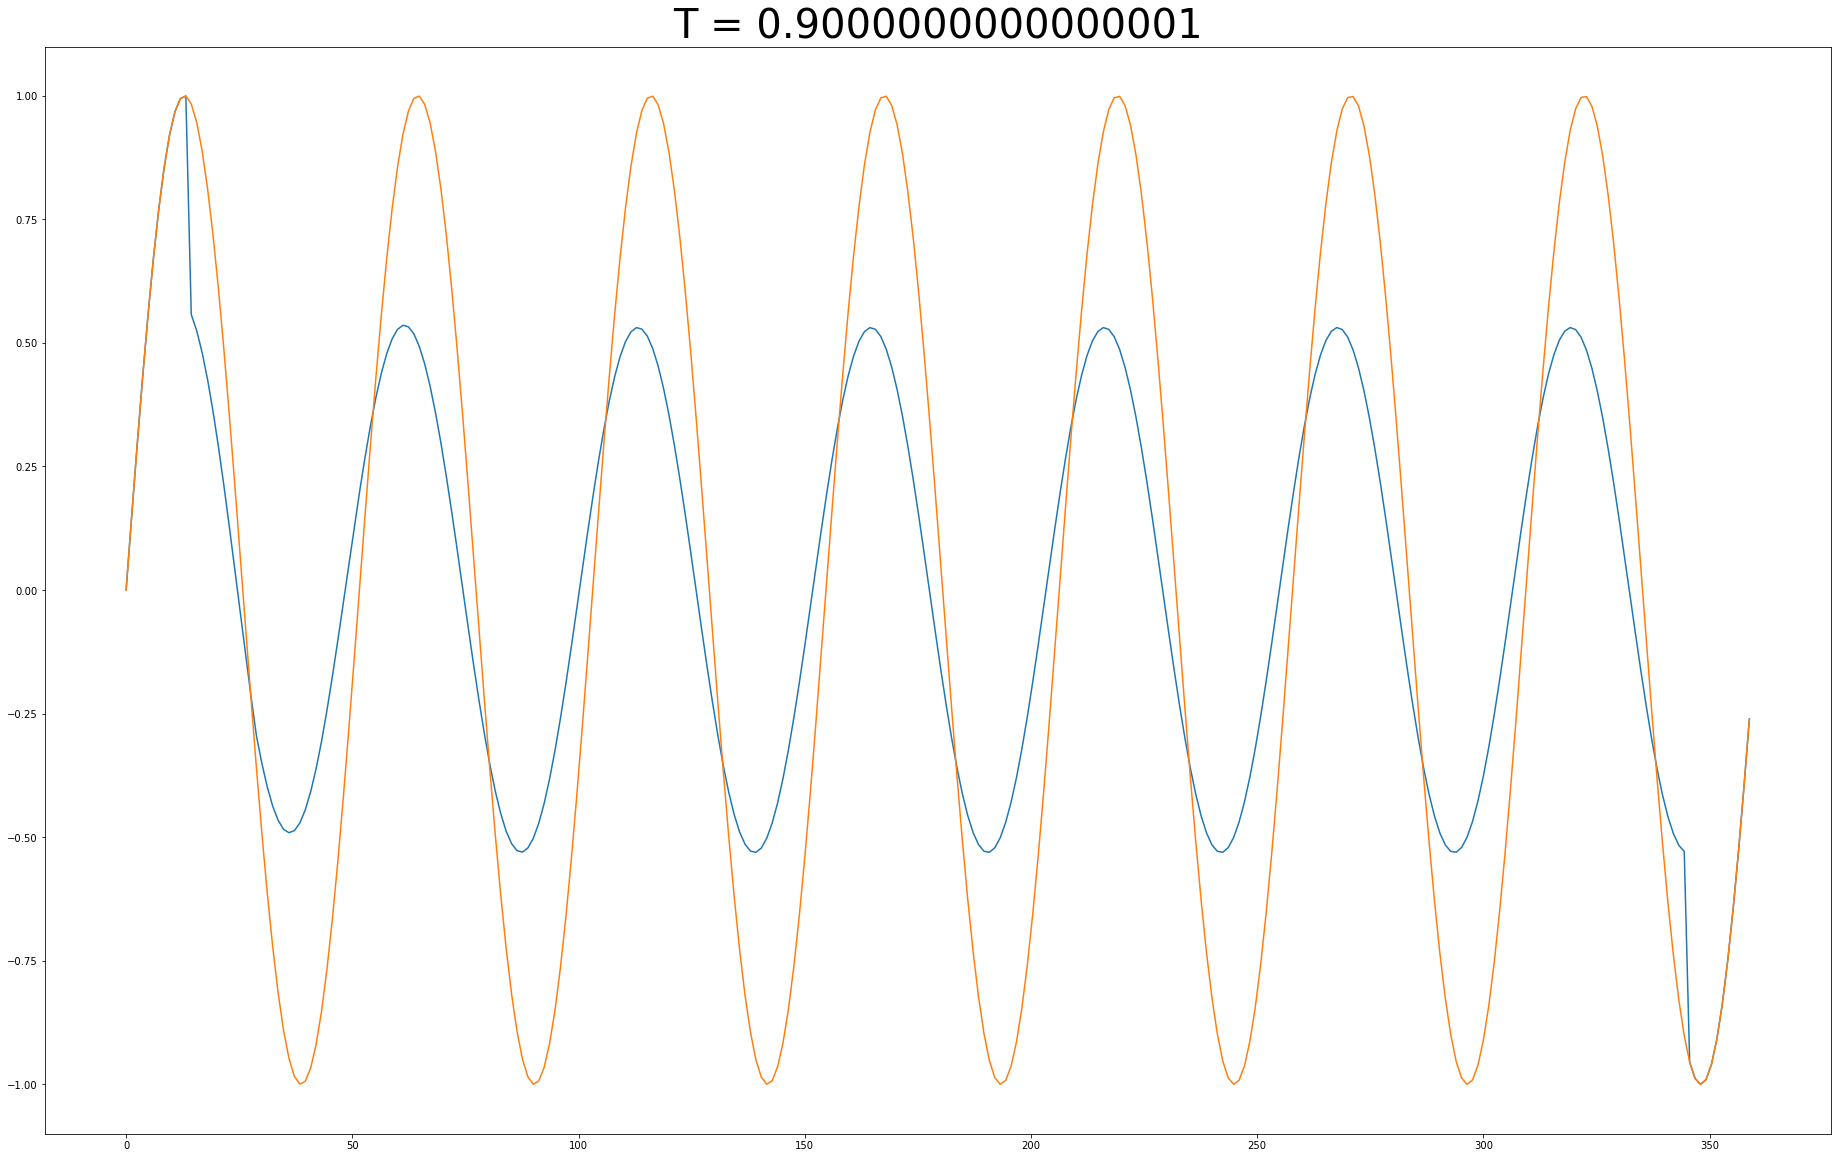

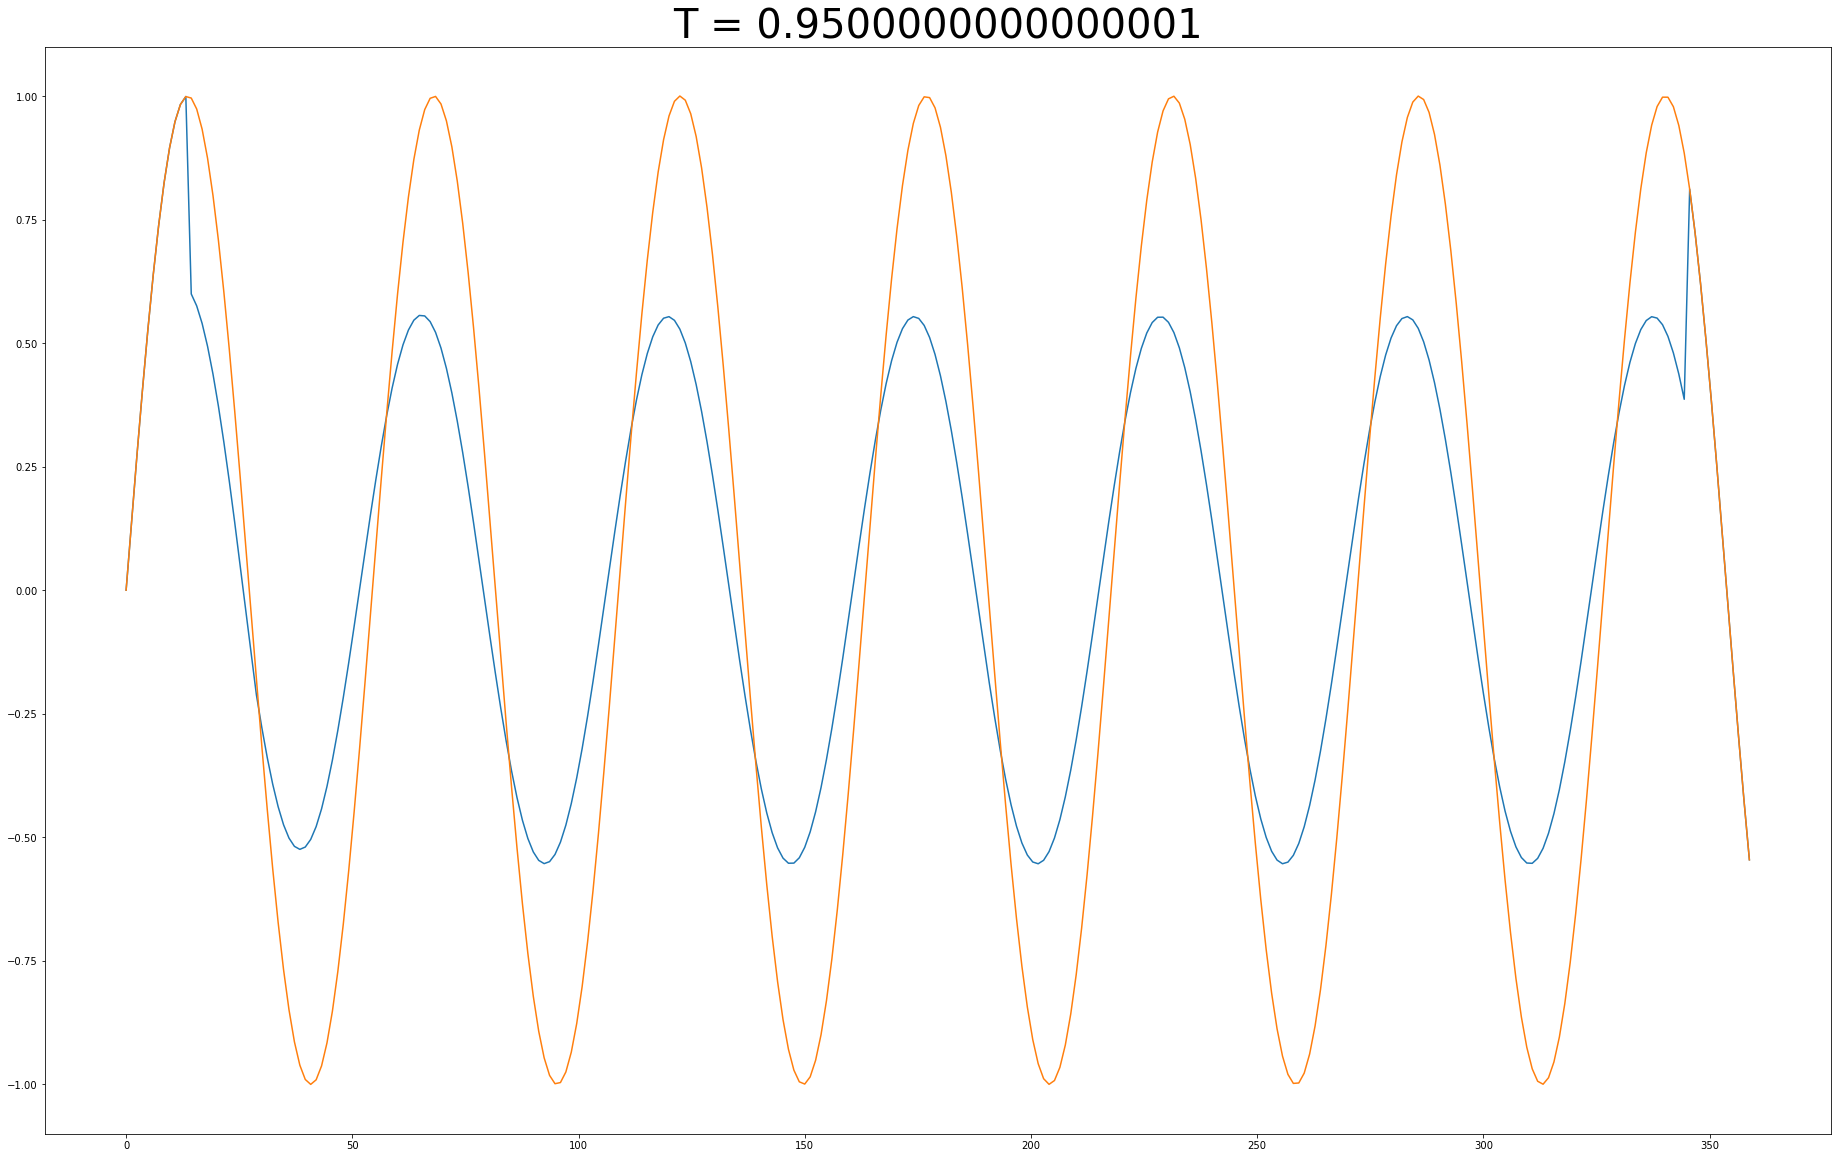

In [152]:
M = 25
TT = np.array(np.arange(0.05, 1, 0.05))
for t in TT:
    w = 2 * np.pi / t
    sinus = np.sin(np.array(np.arange(0,360,360 / 300)) / 180 * np.pi * w)
    plt.figure(figsize = (32, 20))
    plt.plot(np.array(np.arange(0,360,360 / 300)), mean_smooth(M, sinus))
    plt.plot(np.array(np.arange(0,360,360 / 300)), sinus)
    plt.title("T = " + str(t), fontsize = 40)
    plt.show()

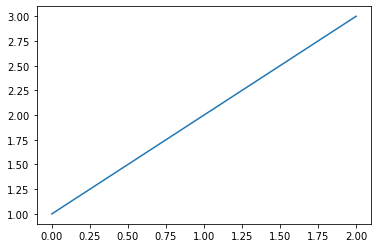

In [3]:
plt.plot([1,2,3])